# Import Libraries

In [1]:
import pandas as pd
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import r2_score

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import xgboost as xg 
from sklearn.multioutput import MultiOutputRegressor
import pickle
import statsmodels.api as sm


In [2]:
curr_dir_path = os.path.dirname(os.path.abspath('preprocessing.ipynb'))
processed_data_path = os.path.join(curr_dir_path, '../data/processed_data/')
final_data_path = os.path.join(curr_dir_path, '../data/final_data/')

# Data Preparation

## Load Dataset

In [3]:
main_df = pd.read_csv(os.path.join(processed_data_path, 'normalized_final_df.csv'))
main_df.head()

GEO_ID     County State   FIPS  RUCC       IRR     SVI  Population  \
0  0500000US45001  Abbeville    SC  45001     6  0.510533  0.5988     24356.0   
1  0500000US51001   Accomack    VA  51001     9  0.502257  0.8597     33191.0   
2  0500000US21001      Adair    KY  21001     7  0.537279  0.6026     19067.0   
3  0500000US29001      Adair    MO  29001     7  0.525863  0.4006     25165.0   
4  0500000US40001      Adair    OK  40001     8  0.526157  0.9472     19576.0   

   Median Income  No Internet  ...  No High School_z  No Vehicle_z  \
0          79568     0.553698  ...          0.084183     -0.226504   
1          74180     0.509143  ...         -0.797731      0.386642   
2          81364     0.499255  ...         -0.881155     -0.187727   
3          75097     0.506373  ...         -1.393618      0.041271   
4          83652     0.766297  ...         -0.368692      0.829049   

   Housing Cost Burden_z  Ratio of Population to Primary Care Physicians_z  \
0              -0.094071                                         -0.464583   
1               0.298276                                         -0.112158   
2              -0.621773                                          0.285058   
3               0.438854                                         -0.971618   
4               0.062380                                          0.322751   

   Unemployment_z  Uninsured_z  Long Commutes_z  Drinking Water Violations_z  \
0       -0.037080     0.214339         1.096177                     1.342678   
1       -0.497592     0.245101        -0.588819                     1.342678   
2        0.483334    -0.885138        -0.438845                    -0.744780   
3       -0.716574     0.313385        -1.356330                     1.342678   
4       -0.438766     1.615693         0.619790                    -0.744780   

   Natural Disaster Risk_z  Food Insecurity_z  
0                -0.256835          -0.996479  
1                 1.714967          -0.968102  
2                -0.357953           0.167006  
3                 0.241356          -0.060015  
4                 0.811070           1.245359  

[5 rows x 49 columns]

In [4]:
main_df.columns

Index(['GEO_ID', 'County', 'State', 'FIPS', 'RUCC', 'IRR', 'SVI', 'Population',
       'Median Income', 'No Internet', 'No College',
       'Ratio of Mental Health Providers to Population', 'Percent Non-White',
       'Poverty', 'No Plumbing Facilities', '65+', 'No High School',
       'No Vehicle', 'Housing Cost Burden',
       'Ratio of Population to Primary Care Physicians', 'Unemployment',
       'Uninsured', 'Long Commutes', 'Drinking Water Violations',
       'Natural Disaster Risk', 'Food Insecurity', 'Heart Disease Mortality',
       'Preventable Hospital Stays', 'Poor or Fair Health', 'Infant Mortality',
       'Premature Mortality', 'Median Income_z', 'No Internet_z',
       'No College_z', 'Ratio of Mental Health Providers to Population_z',
       'Percent Non-White_z', 'Poverty_z', 'No Plumbing Facilities_z', '65+_z',
       'No High School_z', 'No Vehicle_z', 'Housing Cost Burden_z',
       'Ratio of Population to Primary Care Physicians_z', 'Unemployment_z',
       'Unins

## Define SDOH and Outcome Variables

In [6]:
SDOH_variables = ['Median Income', 'No Internet', 'No College',
                'Ratio of Mental Health Providers to Population', 'Percent Non-White',
                'Poverty', 'No Plumbing Facilities', '65+', 'No High School',
                'No Vehicle', 'Housing Cost Burden',
                'Ratio of Population to Primary Care Physicians', 'Unemployment',
                'Uninsured', 'Long Commutes', 'Drinking Water Violations',
                'Natural Disaster Risk', 'Food Insecurity']

SDOH_variables_z = ['Median Income_z', 'No Internet_z',
                    'No College_z', 'Ratio of Mental Health Providers to Population_z',
                    'Percent Non-White_z', 'Poverty_z', 'No Plumbing Facilities_z', '65+_z',
                    'No High School_z', 'No Vehicle_z', 'Housing Cost Burden_z',
                    'Ratio of Population to Primary Care Physicians_z', 'Unemployment_z',
                    'Uninsured_z', 'Long Commutes_z', 'Drinking Water Violations_z',
                    'Natural Disaster Risk_z', 'Food Insecurity_z']

outcome_variables = ['Premature Mortality', 'Infant Mortality', 'Preventable Hospital Stays', 'Heart Disease Mortality', 'Poor or Fair Health']

primary_variables = ['GEO_ID', 'County', 'State', 'FIPS', 'Population']

rural_variables = ['RUCC', 'IRR', 'SVI']

SDOH_df = main_df[primary_variables + SDOH_variables]
SDOH_z_df = main_df[primary_variables + SDOH_variables_z]
outcome_df = main_df[primary_variables + outcome_variables]
rural_df = main_df[primary_variables + rural_variables]

## Preprocess and Normalize Dataset

### Convert All Columns to Numeric

In [47]:
for column in SDOH_variables:
    if column in SDOH_df.columns:
        print(f"Column '{column}' type: {type(SDOH_df[column])}")
        try:
            SDOH_df[column] = pd.to_numeric(SDOH_df[column], errors='coerce')
        except Exception as e:
            print(f"Error converting column {column}: {e}")

print(SDOH_df[SDOH_variables].isnull().sum())

Column 'Median Income' type: <class 'pandas.core.series.Series'>
Column 'Poverty 18-64' type: <class 'pandas.core.series.Series'>
Column 'Unemployment' type: <class 'pandas.core.series.Series'>
Column 'Lacking Complete Plumbing Facilities' type: <class 'pandas.core.series.Series'>
Column '65+' type: <class 'pandas.core.series.Series'>
Column 'White Population' type: <class 'pandas.core.series.Series'>
Column 'Percent Less Than High School Graduate' type: <class 'pandas.core.series.Series'>
Column 'Uninsured' type: <class 'pandas.core.series.Series'>
Column 'Percent With Internet' type: <class 'pandas.core.series.Series'>
Column 'Long Commutes' type: <class 'pandas.core.series.Series'>
Column 'Some College or Associate's Degree' type: <class 'pandas.core.series.Series'>
Column 'No Vehicle Available' type: <class 'pandas.core.series.Series'>
Column 'Housing Cost Burden' type: <class 'pandas.core.series.Series'>
Column 'Ratio of population to primary care physicians' type: <class 'pandas.

/tmp/ipykernel_13680/1214728456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDOH_df[column] = pd.to_numeric(SDOH_df[column], errors='coerce')


In [48]:
for column in outcome_variables:
    if column in outcome_df.columns:
        print(f"Column '{column}' type: {type(outcome_df[column])}")
        try:
            outcome_df[column] = pd.to_numeric(outcome_df[column], errors='coerce')
        except Exception as e:
            print(f"Error converting column {column}: {e}")

print(outcome_df[outcome_variables].isnull().sum())

Column 'Premature Mortality' type: <class 'pandas.core.series.Series'>
Column 'Infant Mortality' type: <class 'pandas.core.series.Series'>
Column 'Preventable Hospital Stays' type: <class 'pandas.core.series.Series'>
Column 'Heart Disease Mortality' type: <class 'pandas.core.series.Series'>
Column 'Poor or Fair Health' type: <class 'pandas.core.series.Series'>
Premature Mortality             5
Infant Mortality              875
Preventable Hospital Stays     11
Heart Disease Mortality         0
Poor or Fair Health             0
dtype: int64


/tmp/ipykernel_13680/2052149206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome_df[column] = pd.to_numeric(outcome_df[column], errors='coerce')


### Handle Missing Values via Iterative Imputer

In [7]:
main_df.isnull().sum()

GEO_ID                                                0
County                                                0
State                                                 0
FIPS                                                  0
RUCC                                                  0
IRR                                                   0
SVI                                                   0
Population                                            0
Median Income                                         0
No Internet                                           0
No College                                            0
Ratio of Mental Health Providers to Population       46
Percent Non-White                                     0
Poverty                                               0
No Plumbing Facilities                                0
65+                                                   0
No High School                                        0
No Vehicle                                      

In [8]:
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

SDOH_imputed_df = pd.DataFrame(iterative_imputer.fit_transform(SDOH_df[SDOH_variables]), columns=SDOH_variables)
SDOH_imputed_df = SDOH_imputed_df.join(SDOH_df[primary_variables])

SDOH_imputed_z_df = pd.DataFrame(iterative_imputer.fit_transform(SDOH_z_df[SDOH_variables_z]), columns=SDOH_variables_z)
SDOH_imputed_z_df = SDOH_imputed_z_df.join(SDOH_z_df[primary_variables])


In [9]:
SDOH_imputed_z_df.isnull().sum()

Median Income_z                                     0
No Internet_z                                       0
No College_z                                        0
Ratio of Mental Health Providers to Population_z    0
Percent Non-White_z                                 0
Poverty_z                                           0
No Plumbing Facilities_z                            0
65+_z                                               0
No High School_z                                    0
No Vehicle_z                                        0
Housing Cost Burden_z                               0
Ratio of Population to Primary Care Physicians_z    0
Unemployment_z                                      0
Uninsured_z                                         0
Long Commutes_z                                     0
Drinking Water Violations_z                         0
Natural Disaster Risk_z                             0
Food Insecurity_z                                   0
GEO_ID                      

In [10]:
outcomes_inputed = iterative_imputer.fit_transform(outcome_df[outcome_variables])

outcome_imputed_df = pd.DataFrame(outcomes_inputed, columns=outcome_variables)

### Normalize SDOH Attributes

In [ ]:
# ### NORMALIZE MEDIAN INCOME AND RATIO OF PROVIDERS TO POPULATION
# ### DIVIDE PERCENT LESS THAN HIGH SCHOOL GRADUATE BY 100, NATURAL DISASTER RISK BY 100
# normalized_SDOH_df = SDOH_df.copy()

# for column in SDOH_variables:
#     if column in ['Median Income', 'Ratio of population to primary care physicians']:
#         normalized_SDOH_df[column] = (SDOH_imputed_df[column] - SDOH_imputed_df[column].min()) / (SDOH_imputed_df[column].max() - SDOH_imputed_df[column].min())
#     else:
#         normalized_SDOH_df[column] = SDOH_imputed_df[column]
#     ### !!! Uninsured !!! ###
#     if column in ['Median Income', 'White Population', 'Some College or Associate\'s Degree', 'Mental Health Providers', 'Percent With Internet']:
#         normalized_SDOH_df[column] = 1 - normalized_SDOH_df[column]

# normalized_SDOH_df.head()

Name          GEO_ID           State  \
0  Abbeville County, South Carolina  0500000US45001  South Carolina   
1         Accomack County, Virginia  0500000US51001        Virginia   
2            Adair County, Kentucky  0500000US21001        Kentucky   
3            Adair County, Missouri  0500000US29001        Missouri   
4            Adair County, Oklahoma  0500000US40001        Oklahoma   

  Complete County Name State Abbreviation County Equivalent Name  \
0     Abbeville County                 SC              Abbeville   
1      Accomack County                 VA               Accomack   
2         Adair County                 KY                  Adair   
3         Adair County                 MO                  Adair   
4         Adair County                 OK                  Adair   

   5-digit FIPS Code  Median Income  Poverty 18-64  Unemployment  ...  \
0              45001       0.669838          0.128      0.038694  ...   
1              51001       0.603180          0.122      0.032717  ...   
2              21001       0.692057          0.173      0.045448  ...   
3              29001       0.614524          0.268      0.029875  ...   
4              40001       0.720364          0.197      0.033481  ...   

   Some College or Associate's Degree  No Vehicle Available  \
0                            0.849483              0.022869   
1                            0.875990              0.029466   
2                            0.852992              0.023286   
3                            0.900815              0.025750   
4                            0.865141              0.034226   

   Housing Cost Burden  Ratio of population to primary care physicians  \
0             0.105872                                        0.140299   
1             0.118301                                        0.173647   
2             0.089155                                        0.211232   
3             0.122754                                        0.092323   
4             0.110828                                        0.214799   

   Mental Health Providers  Drinking Water Violations  Food Insecurity  \
0                 0.999384                        1.0            0.096   
1                 0.998704                        1.0            0.097   
2                 0.997273                        0.0            0.137   
3                 0.997099                        1.0            0.129   
4                 0.997497                        0.0            0.175   

   Natural Disaster Risk  RUCC_2023   IRR2000  
0               0.386892        6.0  0.510533  
1               0.895641        9.0  0.502257  
2               0.360802        7.0  0.537279  
3               0.515431        7.0  0.525863  
4               0.662424        8.0  0.526157  

[5 rows x 27 columns]

# Data Visualization

## Pairplot

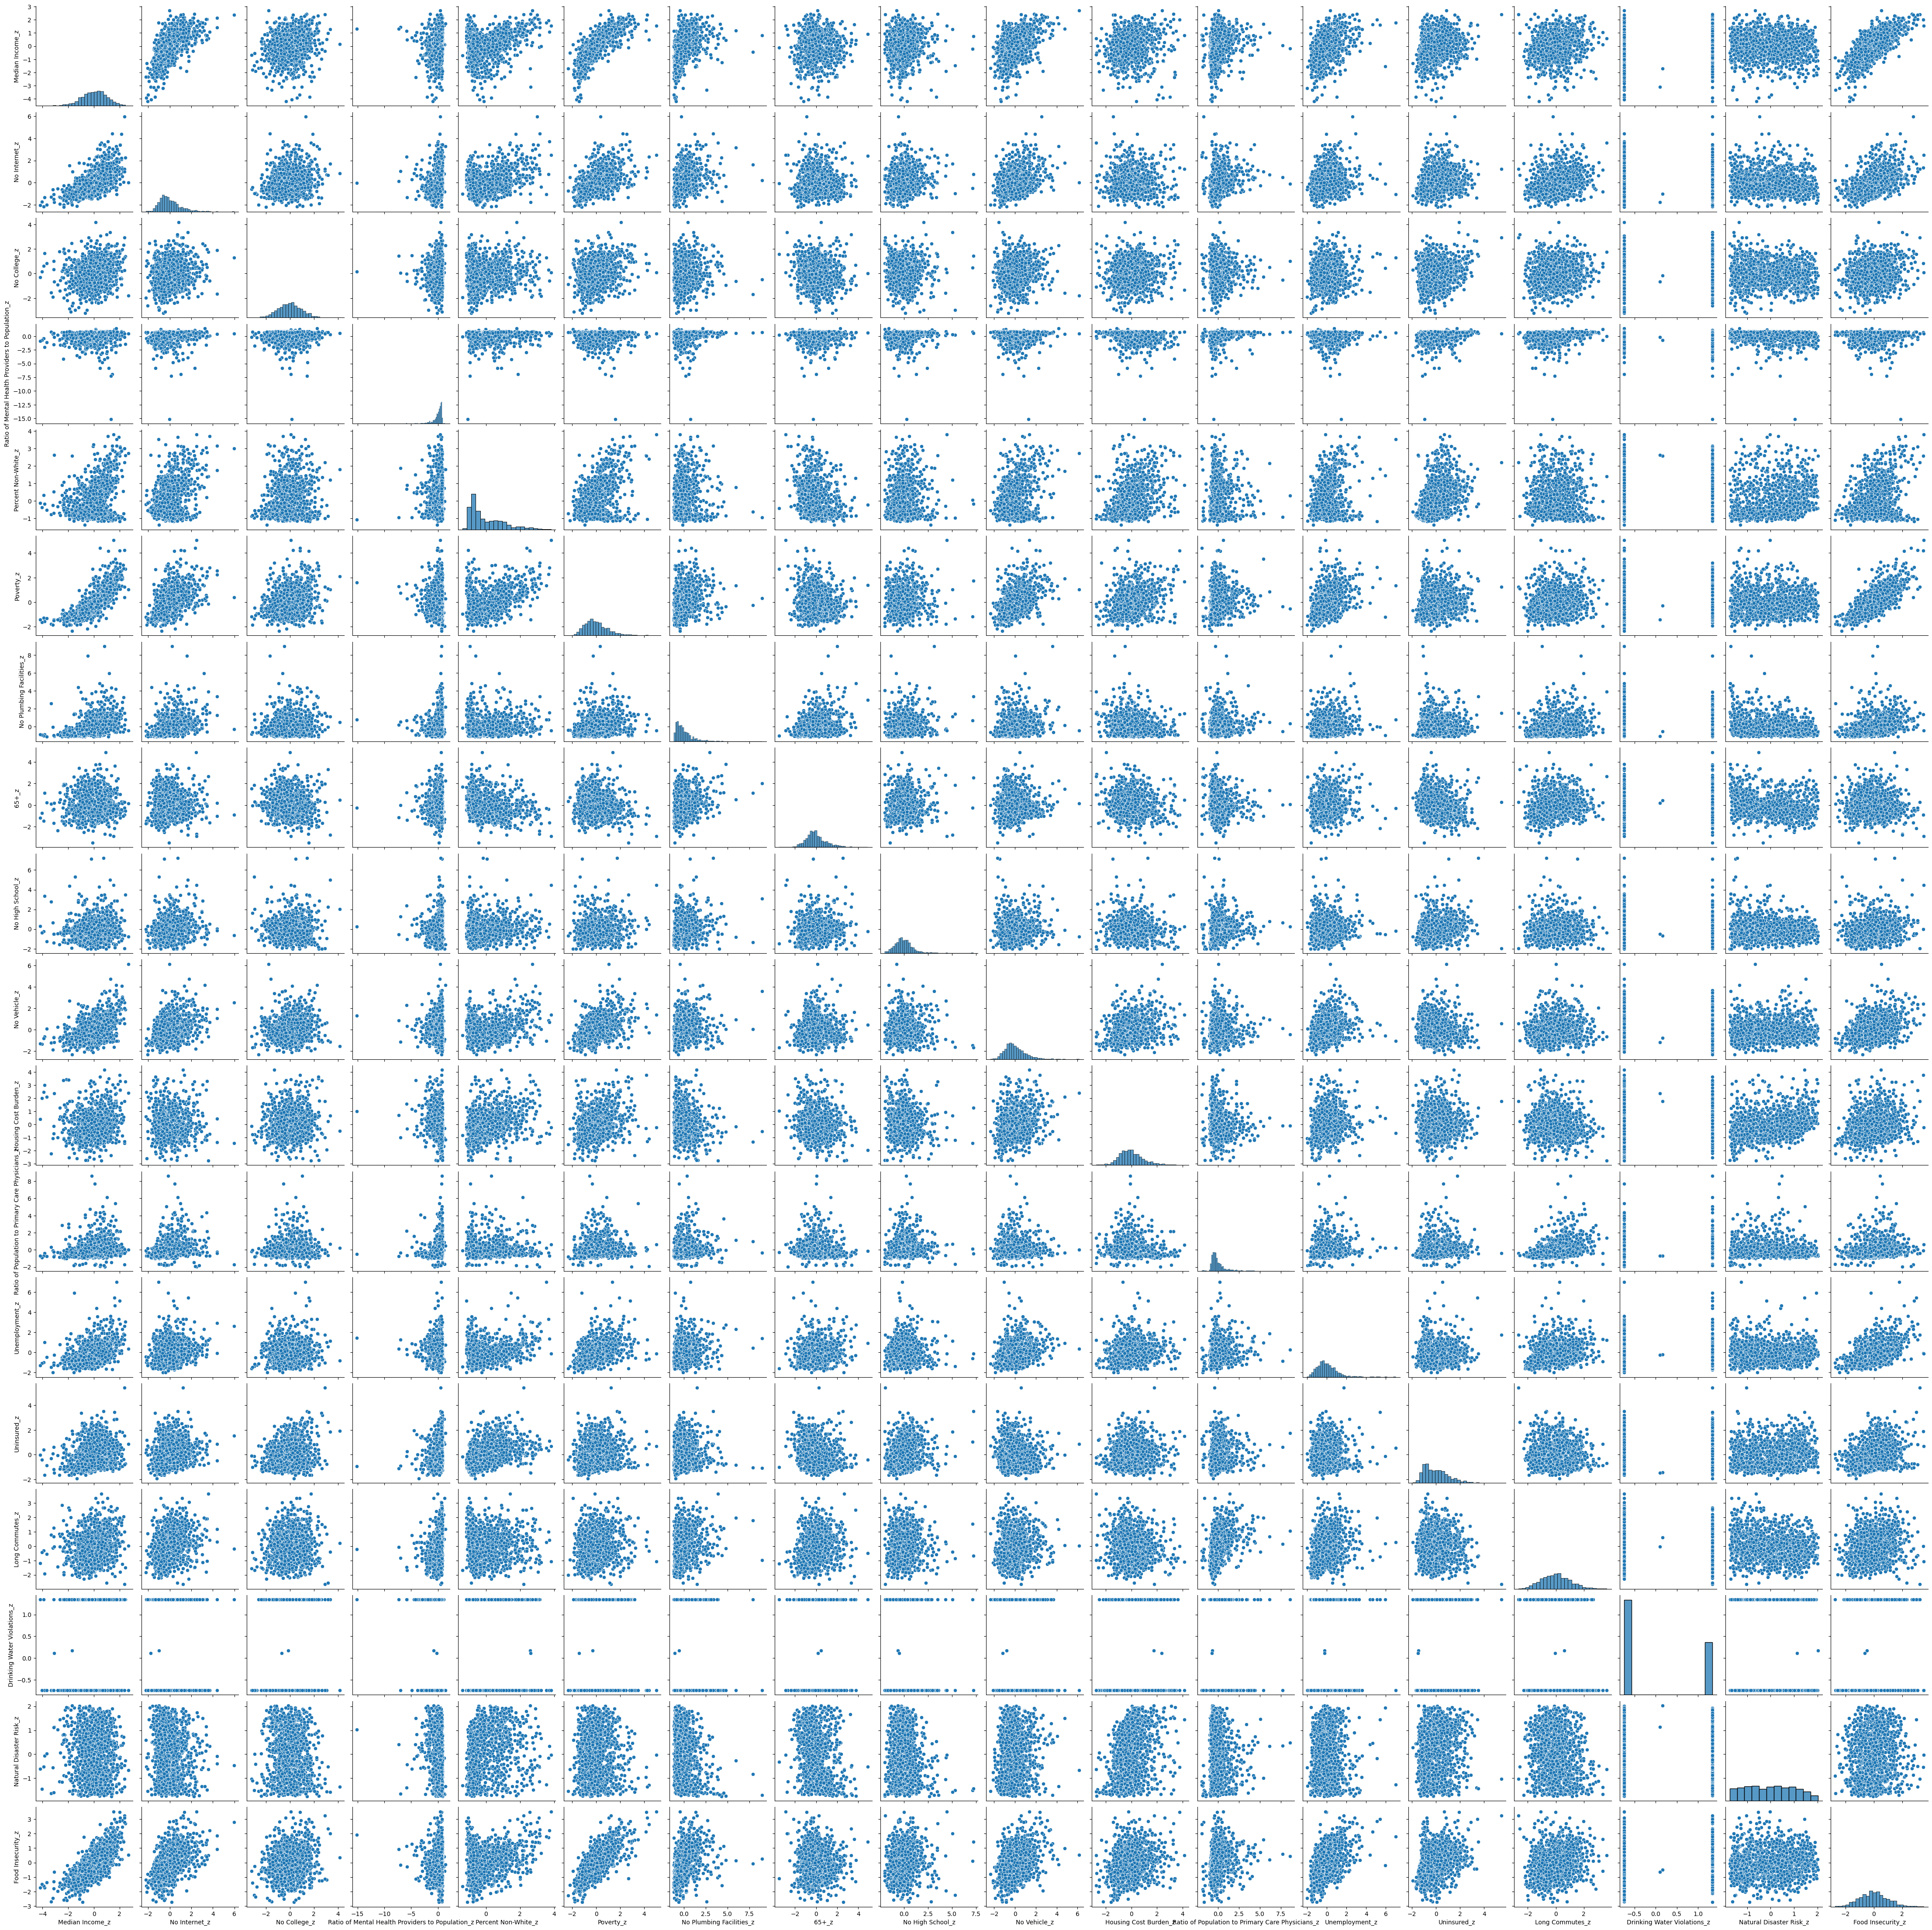

In [11]:
sns.pairplot(SDOH_imputed_z_df[SDOH_variables_z])  # Plot pairwise relationships
plt.show()

## Correlation Matrix

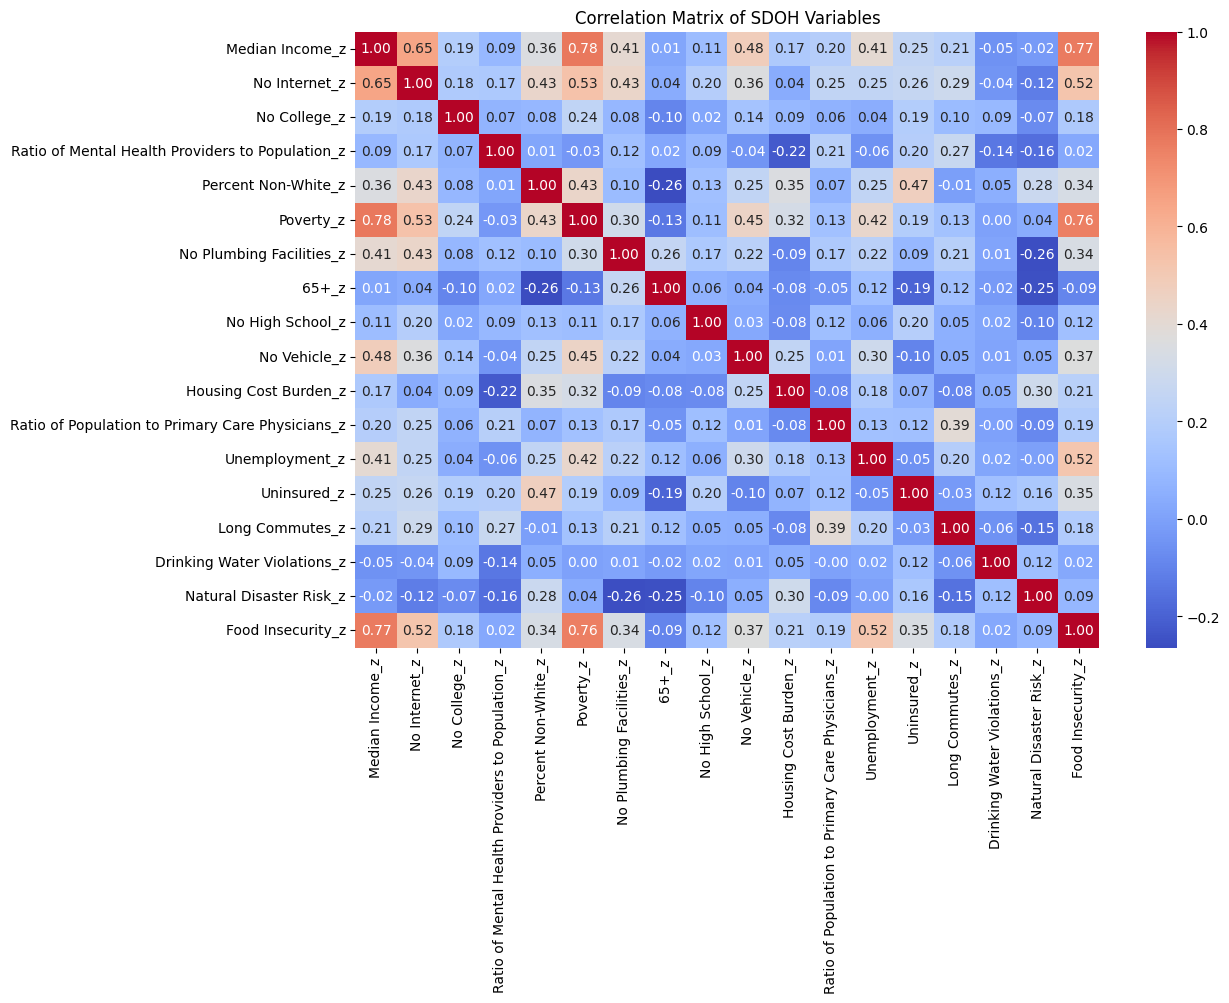

In [12]:
corr_matrix = SDOH_imputed_z_df[SDOH_variables_z].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of SDOH Variables')
plt.show()

# Data Analysis

## Principal Component Analysis

### Generate PCA for All Components/Attributes

In [17]:
SDOH_imputed_z_pca_df = SDOH_imputed_z_df.copy()

pca = PCA(n_components=18)
pca_result = pca.fit_transform(SDOH_imputed_z_df[SDOH_variables_z])

for i in range(1, 19):
    SDOH_imputed_z_pca_df[f'PCA{i}'] = pca_result[:, i - 1]

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.24915921 0.12450527 0.09212124 0.06453792 0.05939778 0.05764954
 0.04620654 0.04564175 0.04210022 0.03855345 0.03436362 0.03144971
 0.03067489 0.02849701 0.02155369 0.0160502  0.00967382 0.00786413]


### PCA Biplot

In [18]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=SDOH_variables_z, index=[f'PCA{i}' for i in range(1, 19)])

print(loadings_df.iloc[:5, :])

      Median Income_z  No Internet_z  No College_z  \
PCA1         0.413696       0.357491      0.137346   
PCA2        -0.035563      -0.144475      0.007970   
PCA3        -0.084447       0.082497      0.140393   
PCA4        -0.010840       0.062737      0.021364   
PCA5        -0.060824      -0.097076      0.593457   

      Ratio of Mental Health Providers to Population_z  Percent Non-White_z  \
PCA1                                          0.052705             0.269455   
PCA2                                         -0.292826             0.293381   
PCA3                                          0.366568             0.224811   
PCA4                                         -0.196712             0.038932   
PCA5                                         -0.123689            -0.201101   

      Poverty_z  No Plumbing Facilities_z     65+_z  No High School_z  \
PCA1   0.400716                  0.232274 -0.023742          0.103057   
PCA2   0.104223                 -0.305471 -0.325642   

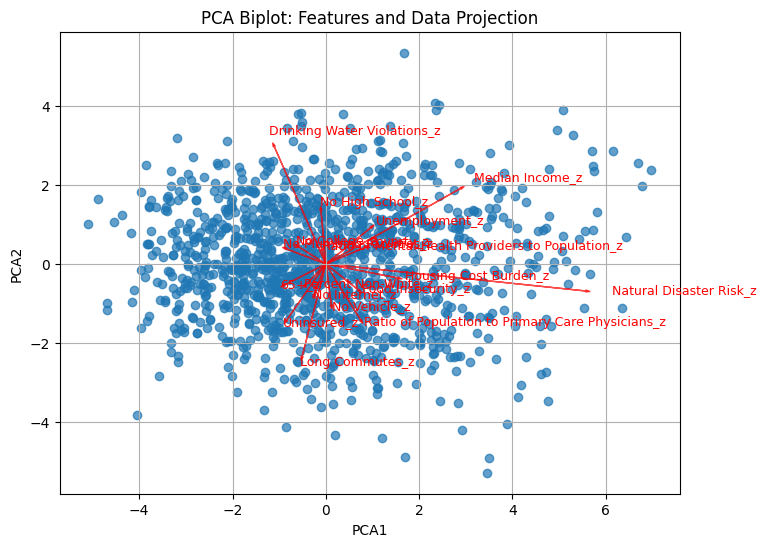

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(SDOH_imputed_z_pca_df['PCA1'], SDOH_imputed_z_pca_df['PCA2'], alpha=0.7)

# Plot the loadings (arrows) for the first two principal components
for i, feature in enumerate(SDOH_variables_z):
    plt.arrow(0, 0, loadings[i, 0]*max(SDOH_imputed_z_pca_df['PCA1']), loadings[i, 1]*max(SDOH_imputed_z_pca_df['PCA2']),
              color='r', alpha=0.7, head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0]*max(SDOH_imputed_z_pca_df['PCA1']) * 1.1, loadings[i, 1]*max(SDOH_imputed_z_pca_df['PCA2']) * 1.1,
             feature, color='r', fontsize=9)

plt.title('PCA Biplot: Features and Data Projection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

### PCA Cumulative Variance Plot

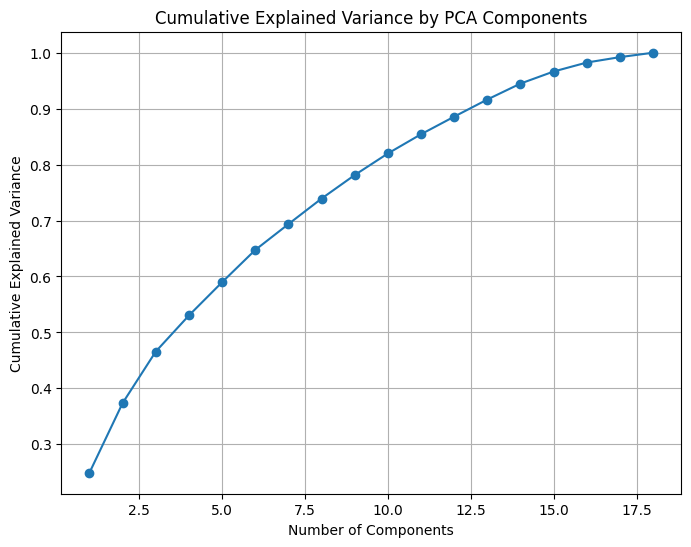

In [22]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 19), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

### PCA State Grouped Plot

In [24]:
SDOH_imputed_z_pca_df['State_Label'] = pd.factorize(SDOH_imputed_z_pca_df['State'])[0]

KeyError: 'State'

In [23]:

plt.figure(figsize=(8, 6))
plt.scatter(SDOH_imputed_z_pca_df['PCA1'], SDOH_imputed_z_pca_df['PCA2'], c=SDOH_imputed_z_pca_df['State_Label'], cmap='viridis', alpha=0.7)
plt.title('PCA: 2D Projection Colored by State')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='State')  # Add a colorbar to indicate the regions
plt.grid(True)
plt.show()

KeyError: 'State_Label'

<Figure size 800x600 with 0 Axes>

## Create a Singular SDOH/RADI Score to Represent Values of All Columns Using PCA

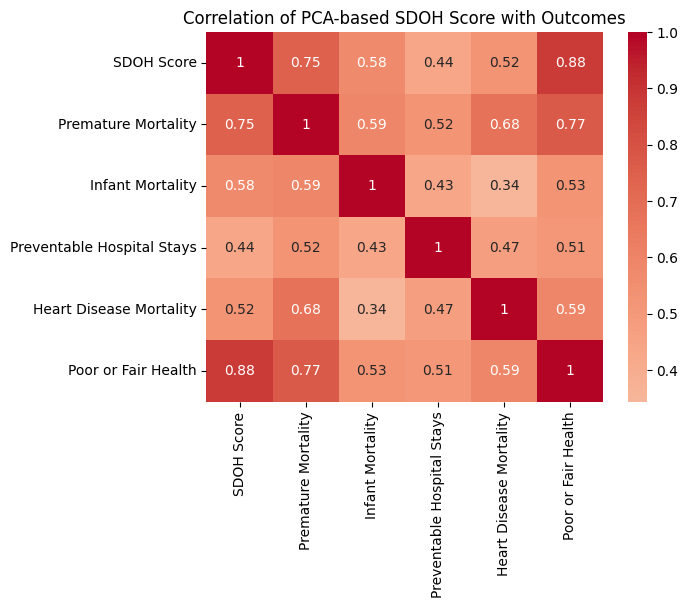

In [13]:
SDOH_imputed_z_pca_df = SDOH_imputed_z_df.copy()

pca = PCA(n_components=1)
principal_component = pca.fit_transform(SDOH_imputed_z_df[SDOH_variables_z])

from sklearn.preprocessing import MinMaxScaler

pc1_scaled = MinMaxScaler().fit_transform(principal_component)

sdoh_score = pc1_scaled * 100
SDOH_imputed_z_pca_df["SDOH Score"] = sdoh_score

sns.heatmap(
    pd.merge(SDOH_imputed_z_pca_df, outcome_df, how='inner', on=primary_variables)[['SDOH Score'] + outcome_variables].corr(),
    annot=True, cmap="coolwarm", center=0
)
plt.title("Correlation of PCA-based SDOH Score with Outcomes")
plt.show()

## Autoencoder-Based Dimensionality Reduction for a Composite SDOH Score

In [64]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(normalized_SDOH_df[SDOH_variables].drop(columns=['IRR2000']))

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_scaled.shape[1], 8),
            nn.ReLU(),
            nn.Linear(8, 1)  # bottleneck (1D SDOH score)
        )
        self.decoder = nn.Sequential(
            nn.Linear(1, 8),
            nn.ReLU(),
            nn.Linear(8, X_scaled.shape[1])
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for batch in dataloader:
        x_batch = batch[0]
        optimizer.zero_grad()
        decoded, encoded = model(x_batch)
        loss = criterion(decoded, x_batch)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    _, encoded_output = model(X_tensor)
    sdoh_score_autoencoder = encoded_output.numpy()

sdoh_score_scaled = MinMaxScaler().fit_transform(sdoh_score_autoencoder) * 100
normalized_SDOH_df["SDOH Score without IRR (Autoencoder)"] = sdoh_score_scaled
normalized_SDOH_df["SDOH Score without IRR (Autoencoder)"] = 100 - normalized_SDOH_df["SDOH Score without IRR (Autoencoder)"]

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(normalized_SDOH_df[SDOH_variables])

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_scaled.shape[1], 8),
            nn.ReLU(),
            nn.Linear(8, 1)  # bottleneck (1D SDOH score)
        )
        self.decoder = nn.Sequential(
            nn.Linear(1, 8),
            nn.ReLU(),
            nn.Linear(8, X_scaled.shape[1])
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for batch in dataloader:
        x_batch = batch[0]
        optimizer.zero_grad()
        decoded, encoded = model(x_batch)
        loss = criterion(decoded, x_batch)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    _, encoded_output = model(X_tensor)
    sdoh_score_autoencoder = encoded_output.numpy()

sdoh_score_scaled = MinMaxScaler().fit_transform(sdoh_score_autoencoder) * 100
normalized_SDOH_df["SDOH Score with IRR (Autoencoder)"] = sdoh_score_scaled
normalized_SDOH_df["SDOH Score with IRR (Autoencoder)"] = 100 - normalized_SDOH_df["SDOH Score with IRR (Autoencoder)"]

## County Scores

In [14]:
SDOH_imputed_z_pca_df.columns

Index(['Median Income_z', 'No Internet_z', 'No College_z',
       'Ratio of Mental Health Providers to Population_z',
       'Percent Non-White_z', 'Poverty_z', 'No Plumbing Facilities_z', '65+_z',
       'No High School_z', 'No Vehicle_z', 'Housing Cost Burden_z',
       'Ratio of Population to Primary Care Physicians_z', 'Unemployment_z',
       'Uninsured_z', 'Long Commutes_z', 'Drinking Water Violations_z',
       'Natural Disaster Risk_z', 'Food Insecurity_z', 'GEO_ID', 'County',
       'State', 'FIPS', 'Population', 'SDOH Score'],
      dtype='object')

In [15]:
county_scores = pd.merge(SDOH_imputed_z_pca_df[primary_variables + ['SDOH Score']], rural_df, how='inner', on=primary_variables)
county_scores = pd.merge(county_scores, outcome_df, how='inner', on=primary_variables)
county_scores_sorted = county_scores.sort_values('SDOH Score', ascending=True)
county_scores_sorted.head(20)

GEO_ID     County State   FIPS  Population  SDOH Score  RUCC  \
1010  0500000US19167      Sioux    IA  19167     36050.0    0.000000     6   
1044  0500000US08117     Summit    CO   8117     30565.0    1.746151     5   
1025  0500000US46117    Stanley    SD  46117      2999.0    3.365531     9   
324   0500000US38025       Dunn    ND  38025      4015.0    3.433808     9   
955   0500000US08107      Routt    CO   8107     25007.0    4.639296     7   
746   0500000US33013  Merrimack    NH  33013    156020.0    5.997495     4   
95    0500000US16013     Blaine    ID  16013     24866.0    7.722142     7   
743   0500000US38057     Mercer    ND  38057      8333.0    7.824005     8   
445   0500000US46057     Hamlin    SD  46057      6352.0    8.147573     9   
126   0500000US38013      Burke    ND  38013      2155.0    8.806285     8   
693   0500000US19125     Marion    IA  19125     33642.0    9.455578     6   
883   0500000US08097     Pitkin    CO   8097     16876.0    9.460672     7   
1027  0500000US31167    Stanton    NE  31167      5717.0    9.498535     9   
12    0500000US50001    Addison    VT  50001     37578.0   10.140683     6   
328   0500000US08037      Eagle    CO   8037     55285.0   10.392364     5   
727   0500000US38055     McLean    ND  38055      9824.0   10.418827     8   
79    0500000US33001    Belknap    NH  33001     64781.0   10.469782     4   
547   0500000US55055  Jefferson    WI  55055     85784.0   10.594078     4   
1002  0500000US20179   Sheridan    KS  20179      2425.0   10.712596     9   
313   0500000US55027      Dodge    WI  55027     88282.0   10.814897     4   

           IRR     SVI  Premature Mortality  Infant Mortality  \
1010  0.517560  0.1311           202.084935               NaN   
1044  0.523947  0.1696           153.327628               NaN   
1025  0.647260  0.0452           369.288492               NaN   
324   0.631437  0.4104           360.813634               NaN   
955   0.574021  0.1314           178.354091               NaN   
746   0.448200  0.2109           314.668296          4.039301   
95    0.578604  0.4025           209.448502               NaN   
743   0.578424  0.3296           326.033443               NaN   
445   0.587411  0.1336           338.187917               NaN   
126   0.661461  0.0363           273.999464               NaN   
693   0.506856  0.0990           336.297809               NaN   
883   0.569773  0.0617           123.258695               NaN   
1027  0.571082  0.0054           278.216205               NaN   
12    0.509003  0.1390           253.966430               NaN   
328   0.531764  0.3497           169.703929               NaN   
727   0.593063  0.0662           382.373551               NaN   
79    0.467643  0.1454           370.127379               NaN   
547   0.462919  0.1276           327.490867          4.184830   
1002  0.653391  0.0706           401.589973               NaN   
313   0.473761  0.1584           362.040268          4.945961   

      Preventable Hospital Stays  Heart Disease Mortality  Poor or Fair Health  
1010                      1128.0                    253.3                0.110  
1044                       266.0                     69.9                0.110  
1025                      1280.0                    240.2                0.104  
324                       1224.0                    294.7                0.143  
955                        623.0                    108.9                0.103  
746                       2209.0                    279.8                0.112  
95                        1048.0                    165.1                0.130  
743                       2446.0                    249.9                0.139  
445                       2785.0                    279.8                0.115  
126                       1721.0                    237.8                0.123  
693                       1470.0                    325.5                0.115  
883                        660.0     

In [16]:
county_scores_sorted.tail(10) 

GEO_ID        County State   FIPS  Population  SDOH Score  RUCC  \
904   0500000US48377      Presidio    TX  48377      5939.0   89.594767     9   
726   0500000US35031      McKinley    NM  35031     69830.0   89.713140     5   
501   0500000US28053     Humphreys    MS  28053      7333.0   89.836366     8   
1208  0500000US48505        Zapata    TX  48505     13849.0   90.321125     6   
1029  0500000US48427         Starr    TX  48427     65728.0   93.169472     4   
34    0500000US04001        Apache    AZ   4001     65432.0   94.796199     8   
520   0500000US28055     Issaquena    MS  28055      1273.0   95.522771     9   
330   0500000US22035  East Carroll    LA  22035      6990.0   97.537016     8   
1081  0500000US46121          Todd    SD  46121      9220.0   98.299226     9   
308   0500000US48127        Dimmit    TX  48127      8387.0  100.000000     7   

           IRR     SVI  Premature Mortality  Infant Mortality  \
904   0.636876  0.9933           370.970667               NaN   
726   0.535409  0.9695           993.731784          6.265458   
501   0.552525  0.9787           904.054386               NaN   
1208  0.565705  0.9968           502.735785               NaN   
1029  0.501942  0.9905           523.987567          4.006799   
34    0.565596  0.9650           941.685007          8.574992   
520   0.612411  0.9539           504.203048               NaN   
330   0.556324  0.8781           708.678936               NaN   
1081  0.600463  0.9475          1232.427341         13.822115   
308   0.573227  0.9994           704.979893               NaN   

      Preventable Hospital Stays  Heart Disease Mortality  Poor or Fair Health  
904                       1351.0                    191.5                0.359  
726                       2703.0                    288.5                0.289  
501                       2618.0                    600.0                0.346  
1208                      5293.0                    298.8                0.330  
1029                      4808.0                    374.2                0.351  
34                        3397.0                    296.8                0.281  
520                          NaN                    429.7                0.311  
330                      10004.0                    495.8                0.380  
1081                      6491.0                    345.8                0.337  
308                       1941.0                    371.1                0.364

In [17]:
county_scores_sorted.to_csv(final_data_path + 'county_SDOH_scores.csv')

# Modeling

In [18]:
import statsmodels.formula.api as smf

## RADI to health outcomes

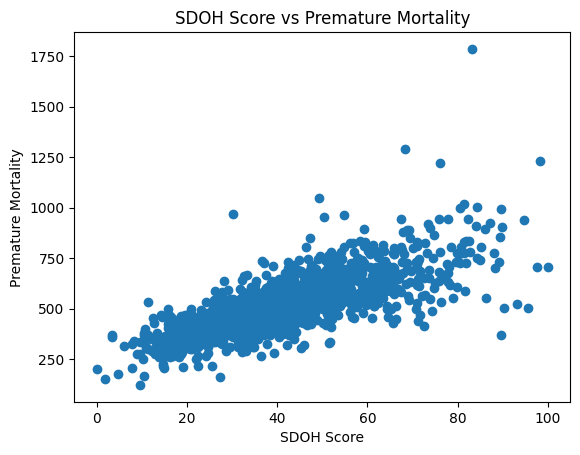


Results for Premature Mortality (SDOH Score):
                             OLS Regression Results                            
Dep. Variable:     Premature Mortality   R-squared:                       0.556
Model:                             OLS   Adj. R-squared:                  0.556
Method:                  Least Squares   F-statistic:                     1514.
Date:                 Mon, 26 May 2025   Prob (F-statistic):          2.23e-215
Time:                         14:17:48   Log-Likelihood:                -7302.8
No. Observations:                 1210   AIC:                         1.461e+04
Df Residuals:                     1208   BIC:                         1.462e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

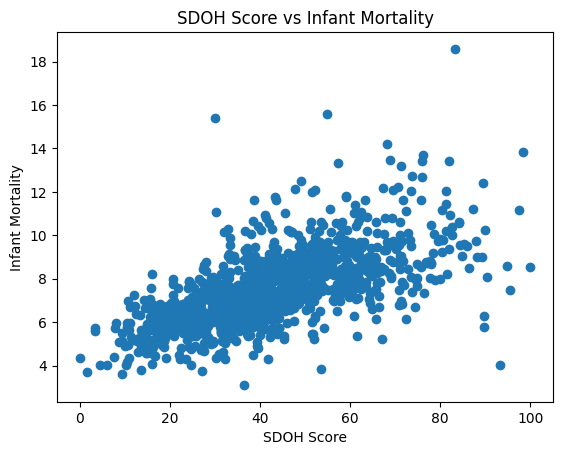


Results for Infant Mortality (SDOH Score):
                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     877.9
Date:                Mon, 26 May 2025   Prob (F-statistic):          1.83e-145
Time:                        14:17:48   Log-Likelihood:                -2042.1
No. Observations:                1210   AIC:                             4088.
Df Residuals:                    1208   BIC:                             4098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

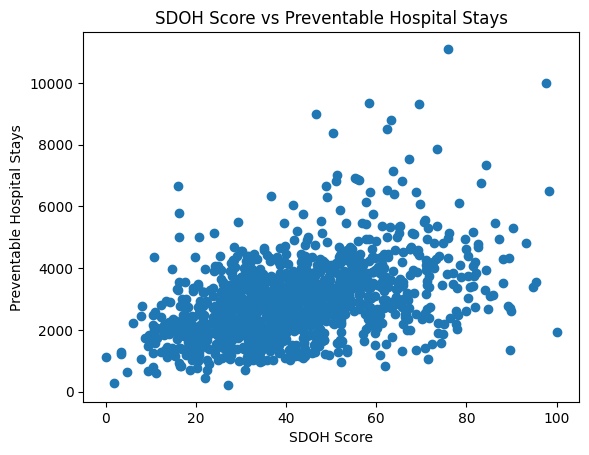


Results for Preventable Hospital Stays (SDOH Score):
                                OLS Regression Results                                
Dep. Variable:     Preventable Hospital Stays   R-squared:                       0.194
Model:                                    OLS   Adj. R-squared:                  0.193
Method:                         Least Squares   F-statistic:                     290.4
Date:                        Mon, 26 May 2025   Prob (F-statistic):           1.60e-58
Time:                                14:17:48   Log-Likelihood:                -10231.
No. Observations:                        1210   AIC:                         2.047e+04
Df Residuals:                            1208   BIC:                         2.048e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

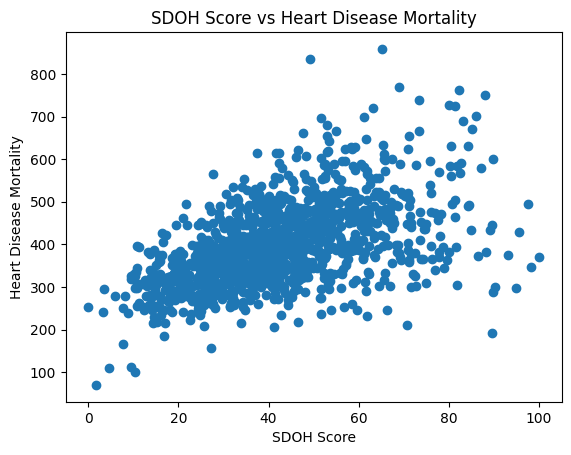


Results for Heart Disease Mortality (SDOH Score):
                               OLS Regression Results                              
Dep. Variable:     Heart Disease Mortality   R-squared:                       0.274
Model:                                 OLS   Adj. R-squared:                  0.274
Method:                      Least Squares   F-statistic:                     456.7
Date:                     Mon, 26 May 2025   Prob (F-statistic):           3.31e-86
Time:                             14:17:48   Log-Likelihood:                -7064.6
No. Observations:                     1210   AIC:                         1.413e+04
Df Residuals:                         1208   BIC:                         1.414e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

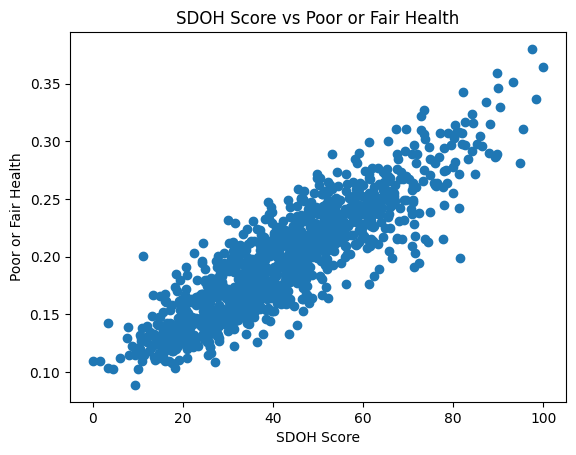


Results for Poor or Fair Health (SDOH Score):
                             OLS Regression Results                            
Dep. Variable:     Poor or Fair Health   R-squared:                       0.772
Model:                             OLS   Adj. R-squared:                  0.772
Method:                  Least Squares   F-statistic:                     4101.
Date:                 Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                         14:17:48   Log-Likelihood:                 2869.3
No. Observations:                 1210   AIC:                            -5735.
Df Residuals:                     1208   BIC:                            -5724.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [53]:
for i in range(len(outcome_variables)):
    # Extract outcome variable
    outcome = outcome_imputed_df[outcome_variables[i]]

    # SDOH Score is the independent variable
    x = SDOH_imputed_z_pca_df['SDOH Score']
    y = outcome

    # Plot the relationship
    plt.scatter(x, y)
    plt.xlabel('SDOH Score')
    plt.ylabel(outcome_variables[i])
    plt.title(f'SDOH Score vs {outcome_variables[i]}')
    plt.show()

    # Add constant to the independent variable (for intercept in linear regression)
    X = sm.add_constant(x)

    # Fit the OLS regression model
    ols_model = sm.OLS(y, X).fit()

    # Print the summary, including p-values
    print(f"\nResults for {outcome_variables[i]} (SDOH Score):")
    print(ols_model.summary())

    # Extract p-values for the SDOH Score and the intercept
    p_values = ols_model.pvalues
    print(f"P-values for {outcome_variables[i]} (SDOH Score):")
    print(f"Intercept p-value: {p_values.iloc[0]}")
    print(f"SDOH Score p-value: {p_values.iloc[1]}")

## RUCC to health outcomes

### RUCC as ordinal

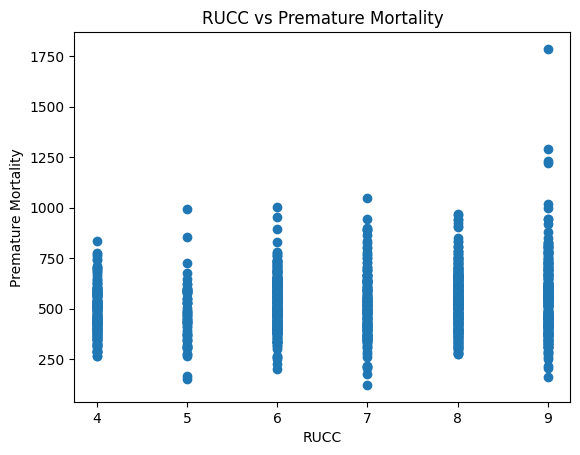


Results for Premature Mortality (RUCC):
                             OLS Regression Results                            
Dep. Variable:     Premature Mortality   R-squared:                       0.023
Model:                             OLS   Adj. R-squared:                  0.022
Method:                  Least Squares   F-statistic:                     27.87
Date:                 Mon, 26 May 2025   Prob (F-statistic):           1.54e-07
Time:                         14:17:39   Log-Likelihood:                -7780.6
No. Observations:                 1210   AIC:                         1.557e+04
Df Residuals:                     1208   BIC:                         1.558e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

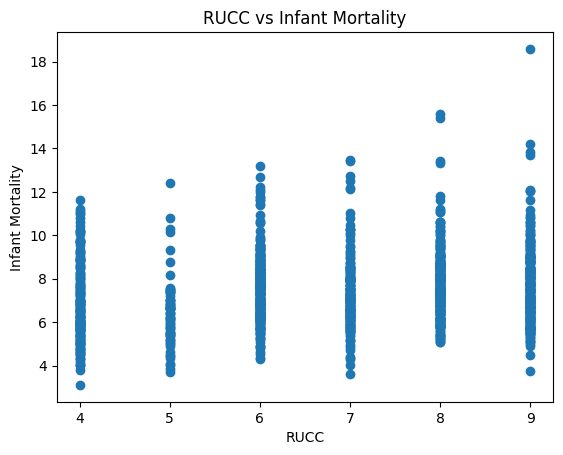


Results for Infant Mortality (RUCC):
                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     37.81
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.06e-09
Time:                        14:17:39   Log-Likelihood:                -2353.9
No. Observations:                1210   AIC:                             4712.
Df Residuals:                    1208   BIC:                             4722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

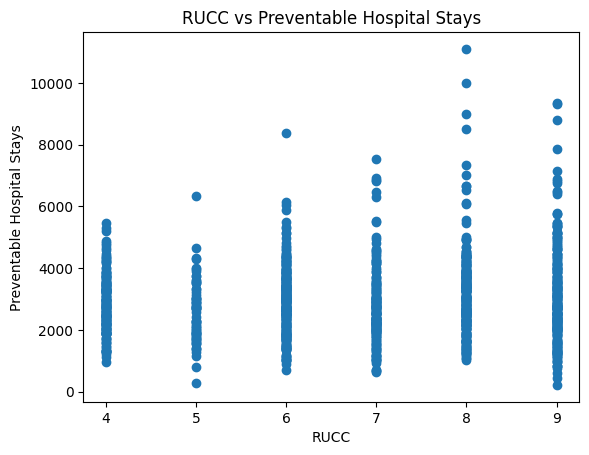


Results for Preventable Hospital Stays (RUCC):
                                OLS Regression Results                                
Dep. Variable:     Preventable Hospital Stays   R-squared:                       0.008
Model:                                    OLS   Adj. R-squared:                  0.007
Method:                         Least Squares   F-statistic:                     9.969
Date:                        Mon, 26 May 2025   Prob (F-statistic):            0.00163
Time:                                14:17:39   Log-Likelihood:                -10356.
No. Observations:                        1210   AIC:                         2.072e+04
Df Residuals:                            1208   BIC:                         2.073e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

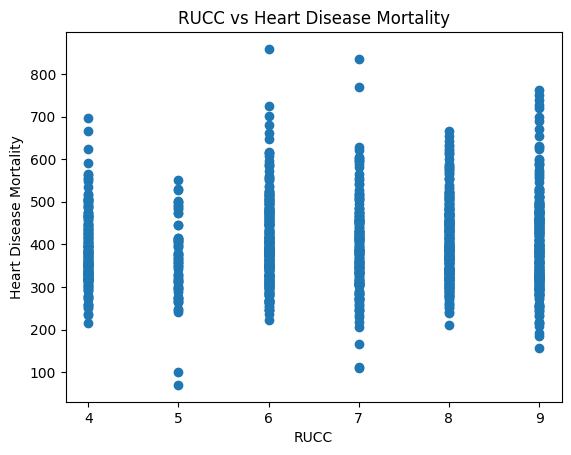


Results for Heart Disease Mortality (RUCC):
                               OLS Regression Results                              
Dep. Variable:     Heart Disease Mortality   R-squared:                       0.004
Model:                                 OLS   Adj. R-squared:                  0.003
Method:                      Least Squares   F-statistic:                     4.872
Date:                     Mon, 26 May 2025   Prob (F-statistic):             0.0275
Time:                             14:17:40   Log-Likelihood:                -7256.2
No. Observations:                     1210   AIC:                         1.452e+04
Df Residuals:                         1208   BIC:                         1.453e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

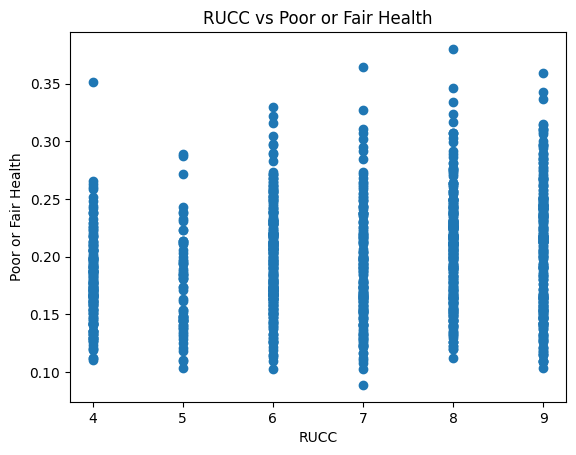


Results for Poor or Fair Health (RUCC):
                             OLS Regression Results                            
Dep. Variable:     Poor or Fair Health   R-squared:                       0.041
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                     51.77
Date:                 Mon, 26 May 2025   Prob (F-statistic):           1.09e-12
Time:                         14:17:40   Log-Likelihood:                 1999.0
No. Observations:                 1210   AIC:                            -3994.
Df Residuals:                     1208   BIC:                            -3984.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [52]:
for i in range(len(outcome_variables)):
    # Extract outcome variable
    outcome = outcome_imputed_df[outcome_variables[i]]

    # RUCC is the independent variable
    x = rural_df['RUCC']
    y = outcome

    # Plot the relationship
    plt.scatter(x, y)
    plt.xlabel('RUCC')
    plt.ylabel(outcome_variables[i])
    plt.title(f'RUCC vs {outcome_variables[i]}')
    plt.show()

    # Add constant to the independent variable (for intercept in linear regression)
    X = sm.add_constant(x)

    # Fit the OLS regression model
    ols_model = sm.OLS(y, X).fit()

    # Print the summary, including p-values
    print(f"\nResults for {outcome_variables[i]} (RUCC):")
    print(ols_model.summary())

    # Extract p-values for the RUCC and the intercept
    p_values = ols_model.pvalues
    print(f"P-values for {outcome_variables[i]} (RUCC):")
    print(f"Intercept p-value: {p_values.iloc[0]}")
    print(f"SDOH Score p-value: {p_values.iloc[1]}")

### RUCC as categorical

In [29]:
RUCC_dummies = pd.get_dummies(rural_df['RUCC'].astype(str), prefix='RUCC', drop_first=True)
RUCC_dummies = RUCC_dummies.apply(pd.to_numeric)

for i in range(len(outcome_variables)):
    y = outcome_imputed_df[outcome_variables[i]]
    y = y.loc[RUCC_dummies.index]

    # Add constant and RUCC dummies
    X = sm.add_constant(RUCC_dummies)
    X = X.astype(float)
    y = y.astype(float)
    # Fit model
    model = sm.OLS(y, X).fit()

    print(f"\nResults for {outcome_variables[i]} (RUCC as categorical):")
    print(model.summary())


Results for Premature Mortality (RUCC as categorical):
                             OLS Regression Results                            
Dep. Variable:     Premature Mortality   R-squared:                       0.028
Model:                             OLS   Adj. R-squared:                  0.024
Method:                  Least Squares   F-statistic:                     6.938
Date:                 Mon, 26 May 2025   Prob (F-statistic):           2.13e-06
Time:                         13:45:37   Log-Likelihood:                -7777.2
No. Observations:                 1210   AIC:                         1.557e+04
Df Residuals:                     1204   BIC:                         1.560e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## IRR to health outcomes

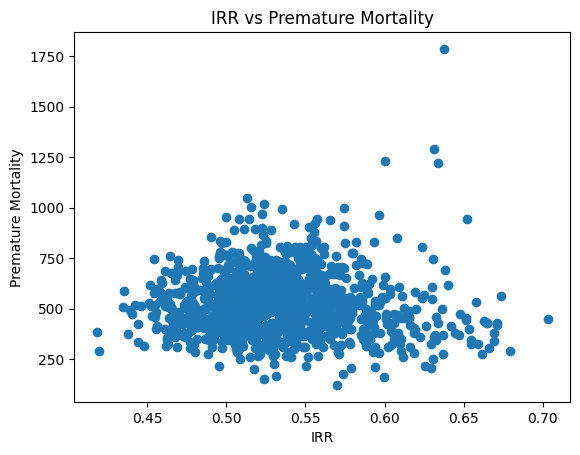


Results for Premature Mortality (IRR):
                             OLS Regression Results                            
Dep. Variable:     Premature Mortality   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.7289
Date:                 Mon, 26 May 2025   Prob (F-statistic):              0.393
Time:                         14:17:18   Log-Likelihood:                -7794.1
No. Observations:                 1210   AIC:                         1.559e+04
Df Residuals:                     1208   BIC:                         1.560e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

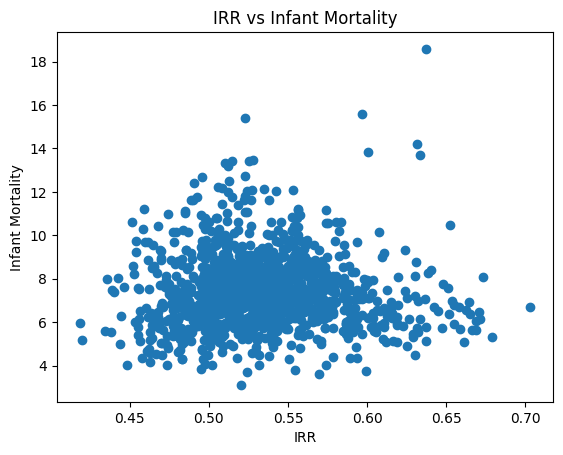


Results for Infant Mortality (IRR):
                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4239
Date:                Mon, 26 May 2025   Prob (F-statistic):              0.515
Time:                        14:17:18   Log-Likelihood:                -2372.4
No. Observations:                1210   AIC:                             4749.
Df Residuals:                    1208   BIC:                             4759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

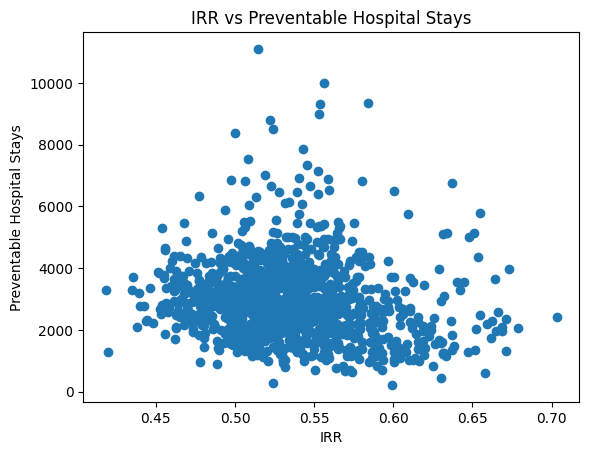


Results for Preventable Hospital Stays (IRR):
                                OLS Regression Results                                
Dep. Variable:     Preventable Hospital Stays   R-squared:                       0.016
Model:                                    OLS   Adj. R-squared:                  0.015
Method:                         Least Squares   F-statistic:                     19.85
Date:                        Mon, 26 May 2025   Prob (F-statistic):           9.13e-06
Time:                                14:17:18   Log-Likelihood:                -10352.
No. Observations:                        1210   AIC:                         2.071e+04
Df Residuals:                            1208   BIC:                         2.072e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

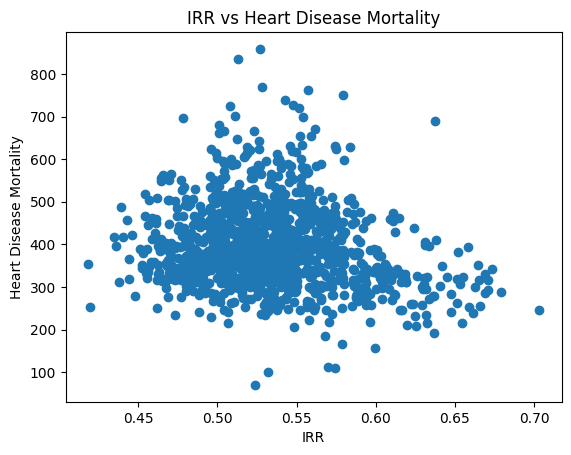


Results for Heart Disease Mortality (IRR):
                               OLS Regression Results                              
Dep. Variable:     Heart Disease Mortality   R-squared:                       0.032
Model:                                 OLS   Adj. R-squared:                  0.032
Method:                      Least Squares   F-statistic:                     40.38
Date:                     Mon, 26 May 2025   Prob (F-statistic):           2.95e-10
Time:                             14:17:19   Log-Likelihood:                -7238.8
No. Observations:                     1210   AIC:                         1.448e+04
Df Residuals:                         1208   BIC:                         1.449e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

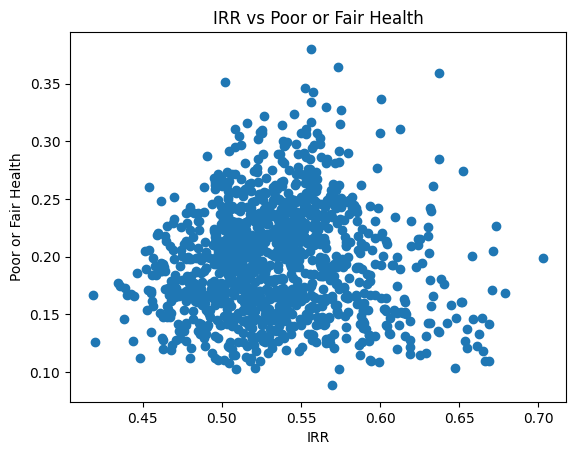


Results for Poor or Fair Health (IRR):
                             OLS Regression Results                            
Dep. Variable:     Poor or Fair Health   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.487
Date:                 Mon, 26 May 2025   Prob (F-statistic):              0.223
Time:                         14:17:19   Log-Likelihood:                 1974.3
No. Observations:                 1210   AIC:                            -3945.
Df Residuals:                     1208   BIC:                            -3934.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [51]:
for i in range(len(outcome_variables)):
    # Extract outcome variable
    outcome = outcome_imputed_df[outcome_variables[i]]

    # IRR is the independent variable
    x = rural_df['IRR']
    y = outcome

    # Plot the relationship
    plt.scatter(x, y)
    plt.xlabel('IRR')
    plt.ylabel(outcome_variables[i])
    plt.title(f'IRR vs {outcome_variables[i]}')
    plt.show()

    # Add constant to the independent variable (for intercept in linear regression)
    X = sm.add_constant(x)

    # Fit the OLS regression model
    ols_model = sm.OLS(y, X).fit()

    # Print the summary, including p-values
    print(f"\nResults for {outcome_variables[i]} (IRR):")
    print(ols_model.summary())

    # Extract p-values for the IRR and the intercept
    p_values = ols_model.pvalues
    print(f"P-values for {outcome_variables[i]} (IRR):")
    print(f"Intercept p-value: {p_values.iloc[0]}")
    print(f"SDOH Score p-value: {p_values.iloc[1]}")

## SVI to health outcomes

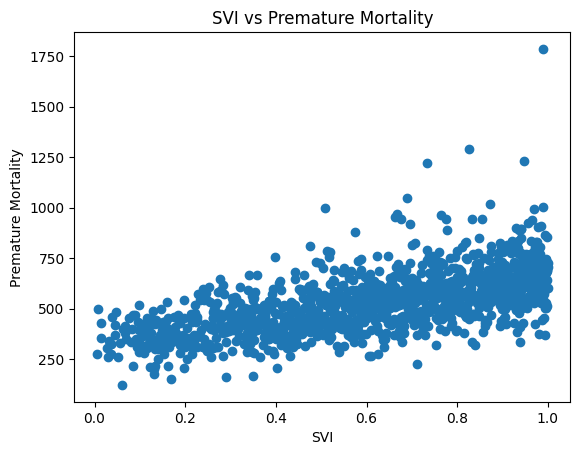


Results for Premature Mortality (SVI):
                             OLS Regression Results                            
Dep. Variable:     Premature Mortality   R-squared:                       0.374
Model:                             OLS   Adj. R-squared:                  0.373
Method:                  Least Squares   F-statistic:                     721.1
Date:                 Mon, 26 May 2025   Prob (F-statistic):          6.05e-125
Time:                         14:17:02   Log-Likelihood:                -7511.2
No. Observations:                 1210   AIC:                         1.503e+04
Df Residuals:                     1208   BIC:                         1.504e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

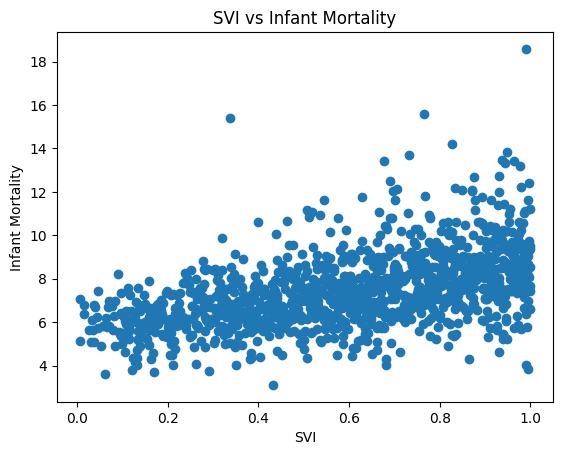


Results for Infant Mortality (SVI):
                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     415.1
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.52e-79
Time:                        14:17:02   Log-Likelihood:                -2193.9
No. Observations:                1210   AIC:                             4392.
Df Residuals:                    1208   BIC:                             4402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

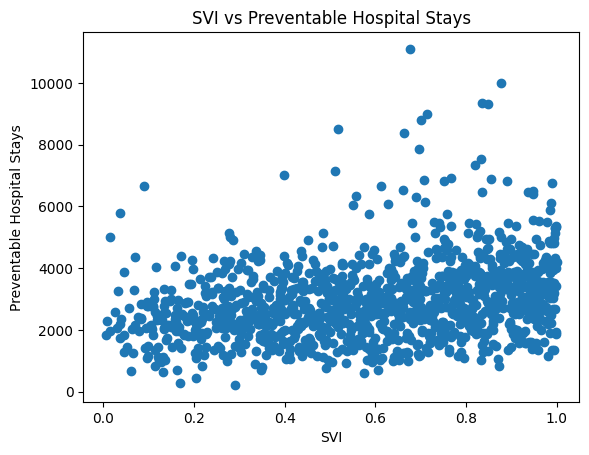


Results for Preventable Hospital Stays (SVI):
                                OLS Regression Results                                
Dep. Variable:     Preventable Hospital Stays   R-squared:                       0.087
Model:                                    OLS   Adj. R-squared:                  0.086
Method:                         Least Squares   F-statistic:                     115.3
Date:                        Mon, 26 May 2025   Prob (F-statistic):           9.52e-26
Time:                                14:17:02   Log-Likelihood:                -10306.
No. Observations:                        1210   AIC:                         2.062e+04
Df Residuals:                            1208   BIC:                         2.063e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

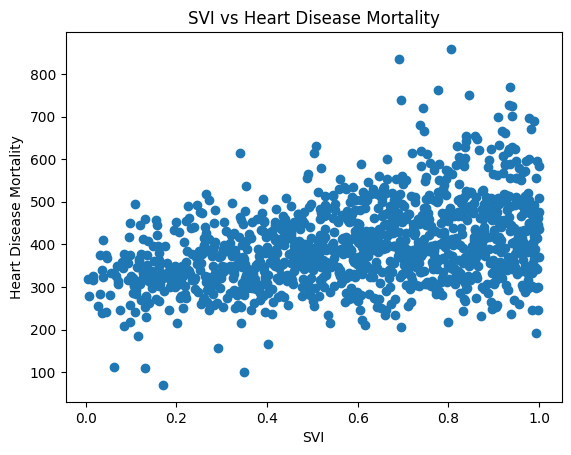


Results for Heart Disease Mortality (SVI):
                               OLS Regression Results                              
Dep. Variable:     Heart Disease Mortality   R-squared:                       0.159
Model:                                 OLS   Adj. R-squared:                  0.158
Method:                      Least Squares   F-statistic:                     228.3
Date:                     Mon, 26 May 2025   Prob (F-statistic):           2.29e-47
Time:                             14:17:02   Log-Likelihood:                -7154.0
No. Observations:                     1210   AIC:                         1.431e+04
Df Residuals:                         1208   BIC:                         1.432e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

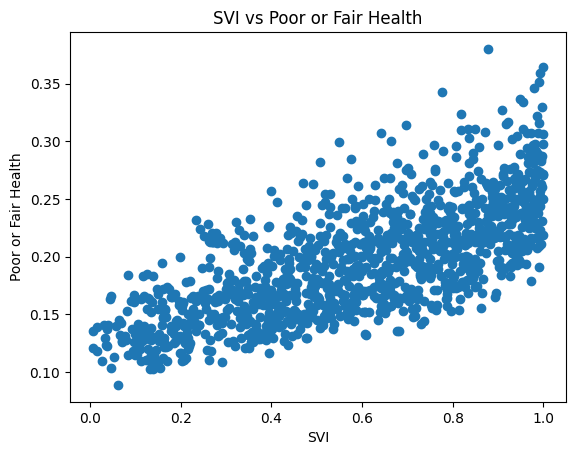


Results for Poor or Fair Health (SVI):
                             OLS Regression Results                            
Dep. Variable:     Poor or Fair Health   R-squared:                       0.501
Model:                             OLS   Adj. R-squared:                  0.501
Method:                  Least Squares   F-statistic:                     1214.
Date:                 Mon, 26 May 2025   Prob (F-statistic):          1.24e-184
Time:                         14:17:02   Log-Likelihood:                 2394.3
No. Observations:                 1210   AIC:                            -4785.
Df Residuals:                     1208   BIC:                            -4774.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [50]:
for i in range(len(outcome_variables)):
    # Extract outcome variable
    outcome = outcome_imputed_df[outcome_variables[i]]

    # SVI is the independent variable
    x = rural_df['SVI']
    y = outcome

    # Plot the relationship
    plt.scatter(x, y)
    plt.xlabel('SVI')
    plt.ylabel(outcome_variables[i])
    plt.title(f'SVI vs {outcome_variables[i]}')
    plt.show()

    # Add constant to the independent variable (for intercept in linear regression)
    X = sm.add_constant(x)

    # Fit the OLS regression model
    ols_model = sm.OLS(y, X).fit()

    # Print the summary, including p-values
    print(f"\nResults for {outcome_variables[i]} (SVI):")
    print(ols_model.summary())

    # Extract p-values for the SVI and the intercept
    p_values = ols_model.pvalues
    print(f"P-values for {outcome_variables[i]} (SVI):")
    print(f"Intercept p-value: {p_values.iloc[0]}")
    print(f"SDOH Score p-value: {p_values.iloc[1]}")

## RADI to RUCC

In [32]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [34]:
x = SDOH_imputed_z_pca_df['SDOH Score']
y = rural_df['RUCC']

X = pd.DataFrame({'SDOH Score': x})

model = OrderedModel(y, X, distr='logit')

results = model.fit(method='bfgs')

print(results.summary())

Optimization terminated successfully.
         Current function value: 1.679016
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
                             OrderedModel Results                             
Dep. Variable:                   RUCC   Log-Likelihood:                -2031.6
Model:                   OrderedModel   AIC:                             4075.
Method:            Maximum Likelihood   BIC:                             4106.
Date:                Mon, 26 May 2025                                         
Time:                        13:57:22                                         
No. Observations:                1210                                         
Df Residuals:                    1204                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

## SVI to RUCC

In [ ]:
x = rural_df['SVI']
y = rural_df['RUCC']

X = pd.DataFrame({'SVI': x})

model = OrderedModel(y, X, distr='logit')

res = model.fit(method='bfgs')

print(res.summary())

Optimization terminated successfully.
         Current function value: 1.712379
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
                             OrderedModel Results                             
Dep. Variable:                   RUCC   Log-Likelihood:                -2072.0
Model:                   OrderedModel   AIC:                             4156.
Method:            Maximum Likelihood   BIC:                             4187.
Date:                Mon, 26 May 2025                                         
Time:                        13:58:16                                         
No. Observations:                1210                                         
Df Residuals:                    1204                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

## Correlation of RADI to SVI

In [36]:
from scipy.stats import pearsonr

In [37]:
x = SDOH_imputed_z_pca_df['SDOH Score']
y = rural_df['SVI']

corr, p_value = pearsonr(x, y)

print(f"Pearson correlation between SDOH Score and SVI: {corr}")
print(f"P-value: {p_value}")

Pearson correlation between SDOH Score and SVI: 0.7082448777903882
P-value: 6.94579305497381e-185


## RADI + SVI to health outcomes

In [47]:
for i in range(len(outcome_variables)):
    y = outcome_imputed_df[outcome_variables[i]]
    x = pd.DataFrame({
        'SDOH Score': SDOH_imputed_z_pca_df['SDOH Score'],
        'SVI': rural_df['SVI']
    })

    # X = sm.add_constant(x)

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    X_scaled = sm.add_constant(X_scaled)

    model = sm.OLS(y, X_scaled).fit()

    print(f"\nResults for {outcome_variables[i]} (SDOH Score + SVI):")
    print(model.summary())

    p_values = model.pvalues
    print(f"P-values for {outcome_variables[i]} (SDOH Score + SVI):")
    print(f"Intercept p-value: {p_values.iloc[0]}")
    print(f"SDOH Score p-value: {p_values.iloc[1]}")
    print(f"SVI p-value: {p_values.iloc[2]}")


Results for Premature Mortality (SDOH Score + SVI):
                             OLS Regression Results                            
Dep. Variable:     Premature Mortality   R-squared:                       0.570
Model:                             OLS   Adj. R-squared:                  0.569
Method:                  Least Squares   F-statistic:                     800.5
Date:                 Mon, 26 May 2025   Prob (F-statistic):          5.10e-222
Time:                         14:16:18   Log-Likelihood:                -7283.6
No. Observations:                 1210   AIC:                         1.457e+04
Df Residuals:                     1207   BIC:                         1.459e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## RADI + RUCC to health outcomes

### RUCC as ordinal

In [48]:
for i in range(len(outcome_variables)):
    y = outcome_imputed_df[outcome_variables[i]]
    x = pd.DataFrame({
        'SDOH Score': SDOH_imputed_z_pca_df['SDOH Score'],
        'RUCC': rural_df['RUCC']
    })

    # X = sm.add_constant(x)

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    X_scaled = sm.add_constant(X_scaled)

    model = sm.OLS(y, X_scaled).fit()

    print(f"\nResults for {outcome_variables[i]} (SDOH Score + RUCC):")
    print(model.summary())

    p_values = model.pvalues
    print(f"P-values for {outcome_variables[i]} (SDOH Score + RUCC):")
    print(f"Intercept p-value: {p_values.iloc[0]}")
    print(f"SDOH Score p-value: {p_values.iloc[1]}")
    print(f"RUCC p-value: {p_values.iloc[2]}")


Results for Premature Mortality (SDOH Score + RUCC):
                             OLS Regression Results                            
Dep. Variable:     Premature Mortality   R-squared:                       0.558
Model:                             OLS   Adj. R-squared:                  0.558
Method:                  Least Squares   F-statistic:                     762.7
Date:                 Mon, 26 May 2025   Prob (F-statistic):          7.24e-215
Time:                         14:16:30   Log-Likelihood:                -7300.1
No. Observations:                 1210   AIC:                         1.461e+04
Df Residuals:                     1207   BIC:                         1.462e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### RUCC as categorical

In [ ]:
RUCC_dummies = pd.get_dummies(rural_df['RUCC'].astype(str), prefix='RUCC', drop_first=True)
RUCC_dummies = RUCC_dummies.apply(pd.to_numeric)

for i in range(len(outcome_variables)):
    y = outcome_imputed_df[outcome_variables[i]]
    
    X = pd.concat([
        SDOH_imputed_z_pca_df['SDOH Score'],
        RUCC_dummies
    ], axis=1)
    
    X = sm.add_constant(X)

    X = X.astype(float)
    y = y.astype(float).loc[X.index]

    model = sm.OLS(y, X).fit()
    
    print(f"\nResults for {outcome_variables[i]} (SDOH + RUCC categorical):")
    print(model.summary())


Results for Premature Mortality (SDOH + RUCC categorical):
                             OLS Regression Results                            
Dep. Variable:     Premature Mortality   R-squared:                       0.561
Model:                             OLS   Adj. R-squared:                  0.558
Method:                  Least Squares   F-statistic:                     255.9
Date:                 Mon, 26 May 2025   Prob (F-statistic):          7.73e-211
Time:                         14:07:59   Log-Likelihood:                -7296.8
No. Observations:                 1210   AIC:                         1.461e+04
Df Residuals:                     1203   BIC:                         1.464e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# RADI Score vs RUCC

In [55]:
county_scores.columns

Index(['GEO_ID', 'County', 'State', 'FIPS', 'Population', 'SDOH Score', 'RUCC',
       'IRR', 'SVI', 'Premature Mortality', 'Infant Mortality',
       'Preventable Hospital Stays', 'Heart Disease Mortality',
       'Poor or Fair Health'],
      dtype='object')

### Rename RADI Score

In [60]:
merged_df = pd.merge(county_scores, SDOH_imputed_df, how='inner', on=primary_variables)
merged_df = pd.merge(merged_df, SDOH_imputed_z_df, how='inner', on=primary_variables)
merged_df

GEO_ID     County State   FIPS  Population  SDOH Score  RUCC  \
0     0500000US45001  Abbeville    SC  45001     24356.0   41.368456     6   
1     0500000US51001   Accomack    VA  51001     33191.0   38.890613     9   
2     0500000US21001      Adair    KY  21001     19067.0   40.573009     7   
3     0500000US29001      Adair    MO  29001     25165.0   45.444244     7   
4     0500000US40001      Adair    OK  40001     19576.0   70.904987     8   
...              ...        ...   ...    ...         ...         ...   ...   
1205  0500000US37199     Yancey    NC  37199     18811.0   40.206755     8   
1206  0500000US46135    Yankton    SD  46135     23373.0   10.841175     7   
1207  0500000US36123      Yates    NY  36123     24451.0   34.386083     6   
1208  0500000US48505     Zapata    TX  48505     13849.0   90.321125     6   
1209  0500000US48507     Zavala    TX  48507      9377.0   73.602299     7   

           IRR     SVI  Premature Mortality  ...  No High School_z  \
0     0.510533  0.5988           564.941382  ...          0.084183   
1     0.502257  0.8597           536.960650  ...         -0.797731   
2     0.537279  0.6026           540.498014  ...         -0.881155   
3     0.525863  0.4006           473.632065  ...         -1.393618   
4     0.526157  0.9472           722.921916  ...         -0.368692   
...        ...     ...                  ...  ...               ...   
1205  0.521231  0.5307           457.539735  ...          0.715823   
1206  0.529090  0.2014           350.690216  ...         -1.048004   
1207  0.510243  0.5724           338.097110  ...          0.918425   
1208  0.565705  0.9968           502.735785  ...          0.906507   
1209  0.575581  0.9090           653.844474  ...          1.418971   

      No Vehicle_z  Housing Cost Burden_z  \
0        -0.226504              -0.094071   
1         0.386642               0.298276   
2        -0.187727              -0.621773   
3         0.041271               0.438854   
4         0.829049               0.062380   
...            ...                    ...   
1205     -0.306505              -0.073455   
1206     -0.304128              -1.364377   
1207      2.129688               0.336515   
1208      0.842538               0.307468   
1209     -0.696778              -1.129241   

      Ratio of Population to Primary Care Physicians_z  Unemployment_z  \
0                                            -0.464583       -0.037080   
1                                            -0.112158       -0.497592   
2                                             0.285058        0.483334   
3                                            -0.971618       -0.716574   
4                                             0.322751       -0.438766   
...                                                ...             ...   
1205                                         -0.528696       -0.258977   
1206                                         -0.815874       -1.617767   
1207                                         -0.393449       -0.754014   
1208                                          0.446362        2.314472   
1209                                          0.075971        3.585812   

      Uninsured_z  Long Commutes_z  Drinking Water Violations_z  \
0        0.214339         1.096177                     1.342678   
1        0.245101        -0.588819                     1.342678   
2       -0.885138        -0.438845                    -0.744780   
3        0.313385        -1.356330                     1.342678   
4        1.615693         0.619790                    -0.744780   
...           ...              ...                          ...   
1205     0.432162         0.566859                    -0.744780   
1206    -0.180302        -1.912114                    -0.744780   
1207    -0.327434        -0.050679                     1.342678   
1208     2.885644        -0.976985                     1.342678   
1209     1.684839        -1.532769                    -0.744780   

 

In [61]:
merged_df.columns

Index(['GEO_ID', 'County', 'State', 'FIPS', 'Population', 'SDOH Score', 'RUCC',
       'IRR', 'SVI', 'Premature Mortality', 'Infant Mortality',
       'Preventable Hospital Stays', 'Heart Disease Mortality',
       'Poor or Fair Health', 'Median Income', 'No Internet', 'No College',
       'Ratio of Mental Health Providers to Population', 'Percent Non-White',
       'Poverty', 'No Plumbing Facilities', '65+', 'No High School',
       'No Vehicle', 'Housing Cost Burden',
       'Ratio of Population to Primary Care Physicians', 'Unemployment',
       'Uninsured', 'Long Commutes', 'Drinking Water Violations',
       'Natural Disaster Risk', 'Food Insecurity', 'Median Income_z',
       'No Internet_z', 'No College_z',
       'Ratio of Mental Health Providers to Population_z',
       'Percent Non-White_z', 'Poverty_z', 'No Plumbing Facilities_z', '65+_z',
       'No High School_z', 'No Vehicle_z', 'Housing Cost Burden_z',
       'Ratio of Population to Primary Care Physicians_z', 'Unemploym

In [63]:
merged_df = merged_df.rename(columns={'SDOH Score': 'RADI'})
merged_df.to_csv(final_data_path + 'full_final_df.csv', index=False)

# ------------------------  BREAK  ------------------------

# Do we need/want to actually generated RADI tiers??

## RADI Tier Generation

In [81]:
RADI_scores = ['RADI (PCA)', 'RADI (PCA with IRR)', 'RADI (Autoencoder)', 'RADI (Autoencoder with IRR)']

### Create Equal Interval RADI Tiers

In [82]:
for RADI_score in RADI_scores:
    bins = np.linspace(0, 100.001, 7)
    labels = [f'Tier {i}' for i in range(1, 7)]
    radi_tiers = pd.cut(merged_df[RADI_score], bins=bins, labels=labels, right=False)
    merged_df[f'{RADI_score}_tiers_percentile'] = radi_tiers
    print(merged_df[['Complete County Name', '5-digit FIPS Code', RADI_score, f'{RADI_score}_tiers_percentile']].head())

  Complete County Name  5-digit FIPS Code  RADI (PCA)  \
0     Abbeville County              45001   41.829954   
1      Accomack County              51001   40.974590   
2         Adair County              21001   41.759655   
3         Adair County              29001   45.592104   
4         Adair County              40001   72.223656   

  RADI (PCA)_tiers_percentile  
0                      Tier 3  
1                      Tier 3  
2                      Tier 3  
3                      Tier 3  
4                      Tier 5  
  Complete County Name  5-digit FIPS Code  RADI (PCA with IRR)  \
0     Abbeville County              45001            41.155969   
1      Accomack County              51001            40.057507   
2         Adair County              21001            41.613273   
3         Adair County              29001            44.750484   
4         Adair County              40001            71.156309   

  RADI (PCA with IRR)_tiers_percentile  
0                          

In [ ]:
merged_df['RADI_tiers_percentile'].value_counts()

RADI_tiers_percentile
Tier 3    422
Tier 2    324
Tier 4    269
Tier 5    103
Tier 1     62
Tier 6     30
Name: count, dtype: int64

### Quantile Based Tiers

In [83]:
for RADI_score in RADI_scores:
    # Calculate the quantile-based bins (each bin will have an equal number of counties)
    labels = [f'Tier {i}' for i in range(1, 7)]  # You want 6 tiers
    radi_tiers = pd.qcut(merged_df[RADI_score], q=6, labels=labels)

    # Assign the tiers to the dataframe
    merged_df[f'{RADI_score}_tiers_quantile'] = radi_tiers

    # Print the result
    print(merged_df[['Complete County Name', '5-digit FIPS Code', RADI_score, f'{RADI_score}_tiers_quantile']].head())

  Complete County Name  5-digit FIPS Code  RADI (PCA)  \
0     Abbeville County              45001   41.829954   
1      Accomack County              51001   40.974590   
2         Adair County              21001   41.759655   
3         Adair County              29001   45.592104   
4         Adair County              40001   72.223656   

  RADI (PCA)_tiers_quantile  
0                    Tier 4  
1                    Tier 3  
2                    Tier 4  
3                    Tier 4  
4                    Tier 6  
  Complete County Name  5-digit FIPS Code  RADI (PCA with IRR)  \
0     Abbeville County              45001            41.155969   
1      Accomack County              51001            40.057507   
2         Adair County              21001            41.613273   
3         Adair County              29001            44.750484   
4         Adair County              40001            71.156309   

  RADI (PCA with IRR)_tiers_quantile  
0                             Tier 3  
1 

In [107]:
merged_df['RADI_tiers_quantile'].value_counts()

RADI_tiers_quantile
Tier 1    202
Tier 2    202
Tier 6    202
Tier 5    202
Tier 4    201
Tier 3    201
Name: count, dtype: int64

### Save Both RADI and RUCC Scores for Each Rural County

In [84]:
merged_df.columns

Index(['Name', 'GEO_ID', 'State', 'Complete County Name', 'State Abbreviation',
       'County Equivalent Name', '5-digit FIPS Code', 'Median Income',
       'Poverty 18-64', 'Unemployment', 'Lacking Complete Plumbing Facilities',
       '65+', 'White Population', 'Percent Less Than High School Graduate',
       'Uninsured', 'Percent With Internet', 'Long Commutes',
       'Some College or Associate's Degree', 'No Vehicle Available',
       'Housing Cost Burden', 'Ratio of population to primary care physicians',
       'Mental Health Providers', 'Drinking Water Violations',
       'Food Insecurity', 'Natural Disaster Risk', 'RUCC_2023', 'IRR2000',
       'State_Label', 'RADI (PCA)', 'SDOH Score (PCA)', 'RADI (PCA with IRR)',
       'RADI (Autoencoder)', 'RADI (Autoencoder with IRR)',
       'Premature Mortality', 'Infant Mortality', 'Preventable Hospital Stays',
       'Heart Disease Mortality', 'Poor or Fair Health',
       'RADI (PCA)_tiers_percentile', 'RADI (PCA with IRR)_tiers_per

In [87]:
radi_rucc_df = merged_df[['Complete County Name', 'State Abbreviation', '5-digit FIPS Code', 'RUCC_2023',
                          'RADI (PCA)', 'RADI (PCA)_tiers_percentile', 'RADI (PCA)_tiers_quantile', 
                          'RADI (PCA with IRR)', 'RADI (PCA with IRR)_tiers_percentile', 'RADI (PCA with IRR)_tiers_quantile',
                          'RADI (Autoencoder)', 'RADI (Autoencoder)_tiers_percentile', 'RADI (Autoencoder)_tiers_quantile',
                          'RADI (Autoencoder with IRR)', 'RADI (Autoencoder with IRR)_tiers_percentile', 'RADI (Autoencoder with IRR)_tiers_quantile']].copy()
radi_rucc_df

Complete County Name State Abbreviation  5-digit FIPS Code  RUCC_2023  \
0        Abbeville County                 SC              45001        6.0   
1         Accomack County                 VA              51001        9.0   
2            Adair County                 KY              21001        7.0   
3            Adair County                 MO              29001        7.0   
4            Adair County                 OK              40001        8.0   
...                   ...                ...                ...        ...   
1205        Yancey County                 NC              37199        8.0   
1206       Yankton County                 SD              46135        7.0   
1207         Yates County                 NY              36123        6.0   
1208        Zapata County                 TX              48505        6.0   
1209        Zavala County                 TX              48507        7.0   

      RADI (PCA) RADI (PCA)_tiers_percentile RADI (PCA)_tiers_quantile  \
0      41.829954                      Tier 3                    Tier 4   
1      40.974590                      Tier 3                    Tier 3   
2      41.759655                      Tier 3                    Tier 4   
3      45.592104                      Tier 3                    Tier 4   
4      72.223656                      Tier 5                    Tier 6   
...          ...                         ...                       ...   
1205   42.925197                      Tier 3                    Tier 4   
1206   11.410935                      Tier 1                    Tier 1   
1207   34.830365                      Tier 3                    Tier 3   
1208   89.669236                      Tier 6                    Tier 6   
1209   74.212326                      Tier 5                    Tier 6   

      RADI (PCA with IRR) RADI (PCA with IRR)_tiers_percentile  \
0               41.155969                               Tier 3   
1               40.057507                               Tier 3   
2               41.613273                               Tier 3   
3               44.750484                               Tier 3   
4               71.156309                               Tier 5   
...                   ...                                  ...   
1205            43.109573                               Tier 3   
1206            11.491023                               Tier 1   
1207            34.234387                               Tier 3   
1208            88.915582                               Tier 6   
1209            74.052983                               Tier 5   

     RADI (PCA with IRR)_tiers_quantile  RADI (Autoencoder)  \
0                                Tier 3           19.925316   
1                                Tier 3           21.118004   
2                                Tier 4           20.138382   
3                                Tier 4           21.184769   
4                                Tier 6            7.249557   
...                                 ...                 ...   
1205                             Tier 4           18.430588   
1206                             Tier 1           27.910957   
1207                             Tier 3           20.741600   
1208                             Tier 6            3.004196   
1209                             Tier 6            6.638878   

     RADI (Autoencoder)_tiers_percentile RADI (Autoencoder)_tiers_quantile  \
0                                 Tier 2                            Tier 4   
1                                 Tier 2                            Tier 5   
2                                 Tier 2                            Tier 4   
3                                 Tier 2                            Tier 5   
4                                 Tier 1                            Tier 1   
...                                  ...                               ...   
1205                              Tier 2                            Tier 3   
1206 

In [88]:
radi_rucc_df.to_csv(final_data_path + 'radi_rucc.csv', index=False)

## Cross Tabulation of RUCC Codes vs RADI Tiers

In [111]:
contingency_table = pd.crosstab(
    radi_rucc_df['RUCC_2023'],  # Rows: RUCC codes
    radi_rucc_df['RADI_tiers_percentile'],  # Columns: RADI tiers
    dropna=False  # Keep NaN values in the table if they exist
)

contingency_table

RADI_tiers_percentile  Tier 1  Tier 2  Tier 3  Tier 4  Tier 5  Tier 6
RUCC_2023                                                            
4.0                        19      69      63      15       3       1
5.0                        10      28      23       4       0       2
6.0                         8      80     105      59      14       2
7.0                        13      52      73      26      10       1
8.0                         5      48      90      94      26      10
9.0                         7      47      68      71      50      14

# Calculate SDOH Variable Variance within Each RUCC and RADI Category

In [112]:
SDOH_df['RADI_tiers_percentile'] = radi_rucc_df['RADI_tiers_percentile']

/tmp/ipykernel_125940/280310860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDOH_df['RADI_tiers_percentile'] = radi_rucc_df['RADI_tiers_percentile']


In [113]:
SDOH_variables_without_RUCC = [var for var in SDOH_variables if var != 'RUCC_2023']
rucc_grouped = SDOH_df.groupby('RUCC_2023')[SDOH_variables_without_RUCC]
radi_grouped = SDOH_df.groupby('RADI_tiers_percentile')[SDOH_variables_without_RUCC]

rucc_averages = rucc_grouped.mean()
rucc_stds = rucc_grouped.std()
rucc_mins = rucc_grouped.min()
rucc_maxs = rucc_grouped.max()

radi_averages = radi_grouped.mean()
radi_stds = radi_grouped.std()
radi_mins = radi_grouped.min()
radi_maxs = radi_grouped.max()

variance_df = pd.DataFrame({
    'Variable': SDOH_variables_without_RUCC,
    'RUCC_2023_Average': [rucc_averages[var].values for var in SDOH_variables_without_RUCC],
    'RUCC_2023_Standard Deviation': [rucc_stds[var].values for var in SDOH_variables_without_RUCC],
    'RUCC_2023_Minimum': [rucc_mins[var].values for var in SDOH_variables_without_RUCC],
    'RUCC_2023_Maximum': [rucc_maxs[var].values for var in SDOH_variables_without_RUCC],
    'RADI_Average': [radi_averages[var].values for var in SDOH_variables_without_RUCC],
    'RADI_Standard Deviation': [radi_stds[var].values for var in SDOH_variables_without_RUCC],
    'RADI_Minimum': [radi_mins[var].values for var in SDOH_variables_without_RUCC],
    'RADI_Maximum': [radi_maxs[var].values for var in SDOH_variables_without_RUCC]
})

variance_df

/tmp/ipykernel_125940/1352516274.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radi_grouped = SDOH_df.groupby('RADI_tiers_percentile')[SDOH_variables_without_RUCC]


Variable  \
0                                    Median Income   
1                                    Poverty 18-64   
2                                     Unemployment   
3             Lacking Complete Plumbing Facilities   
4                                              65+   
5                                 White Population   
6           Percent Less Than High School Graduate   
7                                        Uninsured   
8                            Percent With Internet   
9                                    Long Commutes   
10              Some College or Associate's Degree   
11                            No Vehicle Available   
12                             Housing Cost Burden   
13  Ratio of population to primary care physicians   
14                         Mental Health Providers   
15                       Drinking Water Violations   
16                                 Food Insecurity   
17                           Natural Disaster Risk   

                                    RUCC_2023_Average  \
0   [61949.95294117647, 63974.59701492537, 58011.4...   
1   [0.15160588235294117, 0.1561044776119403, 0.15...   
2   [0.039321478620588234, 0.03587808672686567, 0....   
3   [0.015315196767733089, 0.014783395178935118, 0...   
4   [0.19294373816110189, 0.17698944824443144, 0.1...   
5   [0.7835601750170909, 0.7510667036217795, 0.766...   
6   [0.1383470588235294, 0.1306865671641791, 0.161...   
7   [0.10799236413764705, 0.12005054757910448, 0.1...   
8   [0.8346618375570589, 0.8366566323179104, 0.800...   
9   [0.292, 0.1952089552238806, 0.3321119402985075...   
10  [0.15846379998112395, 0.15834355867950373, 0.1...   
11  [0.025279869503590603, 0.02420014572829947, 0....   
12  [0.12023331178882354, 0.1253604450358209, 0.11...   
13  [2248.757717235, 1611.8744633749254, 2898.6614...   
14  [0.0024374101376470588, 0.0030873323940298508,...   
15  [0.4823529411764706, 0.4153846153846154, 0.384...   
16  [0.12238823529411766, 0.1206716417910448, 0.12...   
17  [0.6767868840186408, 0.6833190078877012, 0.532...   

                         RUCC_2023_Standard Deviation  \
0   [10111.349612779453, 13074.62925954447, 10691....   
1   [0.04867332198325368, 0.05814301446573243, 0.0...   
2   [0.011318234052822678, 0.010840538188621244, 0...   
3   [0.010852932955303747, 0.012151805285058048, 0...   
4   [0.0391203644193996, 0.04237898964172985, 0.03...   
5   [0.1511096527361568, 0.17719237014798617, 0.17...   
6   [0.05683290797740439, 0.05389951620495305, 0.0...   
7   [0.04563487535796417, 0.04925930416248463, 0.0...   
8   [0.04924167512485196, 0.06965110839576957, 0.0...   
9   [0.07576036652560939, 0.0713188608895913, 0.08...   
10  [0.022088867686565483, 0.02511269081719649, 0....   
11  [0.00921057144761499, 0.008669045003446526, 0....   
12  [0.02917568897517298, 0.036028896670526875, 0....   
13  [1098.7954520710614, 664.3929094985567, 2128.7...   
14  [0.0017301537656409537, 0.0016864088834232607,...   
15  [0.501164672080539, 0.4966232126920925, 0.4873...   
16  [0.027488607265770387, 0.03270825493974076, 0....   
17  [0.19114928577071794, 0.1993798124840902, 0.22...   

                                    RUCC_2023_Minimum  \
0          [36810, 40117, 33188, 32403, 25425, 29014]   
1            [0.07, 0.072, 0.05, 0.054, 0.054, 0.024]   
2   [0.0183405749, 0.0197862846, 0.0186550591, 0.0...   
3   [0.0012269938650306, 0.0014934720817073, 0.002...   
4   [0.0518226135040745, 0.0958269220073784, 0.116...   
5   [0.2488278203029238, 0.1002148073893741, 0.200...   
6   [0.017, 0.0139999999999999, 0.023, 0.005, 0.0,...   
7   [0.0279942709, 0.0494736504, 0.0419248719, 0.0...   
8   [0.6667659765, 0.523549945, 0.5435089845, 0.62...   
9          [0.097, 0.074, 0.081, 0.067, 0.144, 0.019]   
10  [0.0963244613434727, 0.0929042095518161, 0.084...   
11  [0.0072577124563445, 0.0099923991027233, 0.007...   
12  [0.0727818161, 0.0523030942, 0.0495020068, 0.0...   
13  [726.17647059, 529.8908046, 453.90566038, 572

In [114]:
variance_df.to_csv(final_data_path + 'RADI_RUCC_variance_df.csv', index=False)

In [115]:
# set variable as index
variance_df.set_index('Variable', inplace=True)
variance_df

RUCC_2023_Average  \
Variable                                                                                            
Median Income                                   [61949.95294117647, 63974.59701492537, 58011.4...   
Poverty 18-64                                   [0.15160588235294117, 0.1561044776119403, 0.15...   
Unemployment                                    [0.039321478620588234, 0.03587808672686567, 0....   
Lacking Complete Plumbing Facilities            [0.015315196767733089, 0.014783395178935118, 0...   
65+                                             [0.19294373816110189, 0.17698944824443144, 0.1...   
White Population                                [0.7835601750170909, 0.7510667036217795, 0.766...   
Percent Less Than High School Graduate          [0.1383470588235294, 0.1306865671641791, 0.161...   
Uninsured                                       [0.10799236413764705, 0.12005054757910448, 0.1...   
Percent With Internet                           [0.8346618375570589, 0.8366566323179104, 0.800...   
Long Commutes                                   [0.292, 0.1952089552238806, 0.3321119402985075...   
Some College or Associate's Degree              [0.15846379998112395, 0.15834355867950373, 0.1...   
No Vehicle Available                            [0.025279869503590603, 0.02420014572829947, 0....   
Housing Cost Burden                             [0.12023331178882354, 0.1253604450358209, 0.11...   
Ratio of population to primary care physicians  [2248.757717235, 1611.8744633749254, 2898.6614...   
Mental Health Providers                         [0.0024374101376470588, 0.0030873323940298508,...   
Drinking Water Violations                       [0.4823529411764706, 0.4153846153846154, 0.384...   
Food Insecurity                                 [0.12238823529411766, 0.1206716417910448, 0.12...   
Natural Disaster Risk                           [0.6767868840186408, 0.6833190078877012, 0.532...   

                                                                     RUCC_2023_Standard Deviation  \
Variable                                                                                            
Median Income                                   [10111.349612779453, 13074.62925954447, 10691....   
Poverty 18-64                                   [0.04867332198325368, 0.05814301446573243, 0.0...   
Unemployment                                    [0.011318234052822678, 0.010840538188621244, 0...   
Lacking Complete Plumbing Facilities            [0.010852932955303747, 0.012151805285058048, 0...   
65+                                             [0.0391203644193996, 0.04237898964172985, 0.03...   
White Population                                [0.1511096527361568, 0.17719237014798617, 0.17...   
Percent Less Than High School Graduate          [0.05683290797740439, 0.05389951620495305, 0.0...   
Uninsured                                       [0.04563487535796417, 0.04925930416248463, 0.0...   
Percent With Internet                           [0.04924167512485196, 0.06965110839576957, 0.0...   
Long Commutes                                   [0.07576036652560939, 0.0713188608895913, 0.08...   
Some College or Associate's Degree              [0.022088867686565483, 0.02511269081719649, 0....   
No Vehicle Available                            [0.00921057144761499, 0.008669045003446526, 0....   
Housing Cost Burden                             [0.02917568897517298, 0.036028896670526875, 0....   
Ratio of population to primary care physicians  [1098.7954520710614, 664.3929094985567, 2128.7...   
Mental Health Providers                         [0.0017301537656409537, 0.0016864088834232607,...   
Drinking Water Violations                       [0.501164672080539, 0.4966232126920925, 0.4873...   
Food Insecurity                                 [0.027488607265770387, 0.03270825493974076, 0....   
Natural Disaster Risk                           [0.19114928577071794, 0.1993798124840902, 0.22...   

                                      

In [116]:
variance_df.loc['Median Income', 'RUCC_2023_Average']

array([61949.95294118, 63974.59701493, 58011.42910448, 57886.4       ,
       54652.39194139, 53192.32684825])

In [117]:
radi_variance_df = pd.DataFrame({
    'Variable': [],
    'RADI_Tier': [],
    'Average': [],
    'Standard Deviation': [],
    'Minimum': [],
    'Maximum': []
})

for var in SDOH_variables_without_RUCC:
    for tier in ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6']:
        radi_variance_df = pd.concat([radi_variance_df, pd.DataFrame({
            'Variable': [var],
            'RADI_Tier': [tier],
            'Average': [variance_df.loc[var, f'RADI_Average'][['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6'].index(tier)]],
            'Standard Deviation': [variance_df.loc[var, f'RADI_Standard Deviation'][['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6'].index(tier)]],
            'Minimum': [variance_df.loc[var, f'RADI_Minimum'][['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6'].index(tier)]],
            'Maximum':  [variance_df.loc[var, f'RADI_Maximum'][['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6'].index(tier)]]
        })])

radi_variance_df.to_csv(final_data_path + 'radi_variance_df.csv', index=False)

radi_variance_df

Variable RADI_Tier       Average  Standard Deviation  \
0           Median Income    Tier 1  80190.112903        10028.833492   
0           Median Income    Tier 2  67024.169753         6623.291836   
0           Median Income    Tier 3  56674.000000         5690.307987   
0           Median Income    Tier 4  48606.817844         5342.150943   
0           Median Income    Tier 5  42235.815534         5480.244205   
..                    ...       ...           ...                 ...   
0   Natural Disaster Risk    Tier 2      0.450307            0.255660   
0   Natural Disaster Risk    Tier 3      0.452736            0.262058   
0   Natural Disaster Risk    Tier 4      0.468870            0.268494   
0   Natural Disaster Risk    Tier 5      0.418149            0.243306   
0   Natural Disaster Risk    Tier 6      0.366741            0.214713   

         Minimum        Maximum  
0   65537.000000  106255.000000  
0   51250.000000   93655.000000  
0   40380.000000   79505.000000  
0   35084.000000   67689.000000  
0   25425.000000   57928.000000  
..           ...            ...  
0       0.006682       0.975819  
0       0.005091       0.970092  
0       0.007318       0.947184  
0       0.002227       0.943684  
0       0.069360       0.842189  

[108 rows x 6 columns]

In [118]:
rucc_variance_df = pd.DataFrame({
    'Variable': [],
    'RUCC_Tier': [],
    'Average': [],
    'Standard Deviation': [],
    'Minimum': [],
    'Maximum': []
})

for var in SDOH_variables_without_RUCC:
    for tier in [4, 5, 6, 7, 8, 9]:
        rucc_variance_df = pd.concat([rucc_variance_df, pd.DataFrame({
            'Variable': [var],
            'RUCC_Tier': [tier],
            'Average': [variance_df.loc[var, f'RUCC_2023_Average'][[4, 5, 6, 7, 8, 9].index(tier)]],
            'Standard Deviation': [variance_df.loc[var, f'RUCC_2023_Standard Deviation'][[4, 5, 6, 7, 8, 9].index(tier)]],
            'Minimum': [variance_df.loc[var, f'RUCC_2023_Minimum'][[4, 5, 6, 7, 8, 9].index(tier)]],
            'Maximum':  [variance_df.loc[var, f'RUCC_2023_Maximum'][[4, 5, 6, 7, 8, 9].index(tier)]]
        })])
        

rucc_variance_df.to_csv(final_data_path + 'rucc_variance_df.csv', index=False)

rucc_variance_df

Variable  RUCC_Tier       Average  Standard Deviation  \
0           Median Income        4.0  61949.952941        10111.349613   
0           Median Income        5.0  63974.597015        13074.629260   
0           Median Income        6.0  58011.429104        10691.148999   
0           Median Income        7.0  57886.400000        12019.047519   
0           Median Income        8.0  54652.391941        11069.646196   
..                    ...        ...           ...                 ...   
0   Natural Disaster Risk        5.0      0.683319            0.199380   
0   Natural Disaster Risk        6.0      0.532977            0.224825   
0   Natural Disaster Risk        7.0      0.467901            0.232343   
0   Natural Disaster Risk        8.0      0.336090            0.218001   
0   Natural Disaster Risk        9.0      0.276313            0.201176   

         Minimum        Maximum  
0   36810.000000   93944.000000  
0   40117.000000  106255.000000  
0   33188.000000   88478.000000  
0   32403.000000  104803.000000  
0   25425.000000   96339.000000  
..           ...            ...  
0       0.046771       0.975819  
0       0.034680       0.954184  
0       0.006682       0.906141  
0       0.005091       0.933821  
0       0.002227       0.895641  

[108 rows x 6 columns]